# Facebook Page Analysis Project

In [487]:
%pip install matplotlib pandas numpy seaborn wordcloud scikit-learn translators langdetect --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/97/d8/dc2f6bff06a799a5603c414afc6de39c6351fe34892d50b6a077df3be6ac/pandas-2.1.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/da/3c/3ff05c2855eee52588f489a4e607e4a61699a0742aa03ccf641c77f9eb0a/numpy-1.26.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.2 kB 660.6 kB/s eta 0:00:01
     ---------------------------------------- 61.2/61.2 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for scikit-learn from https://


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

### 1. Import & EDA
- Page: <a href="https://www.facebook.com/Biettheeodilam">Biết thế éo đi làm</a>
- Posts: 598
- Crawl time: 11:30:00 18/11/2023

In [502]:
df_raw = pd.read_csv('./Data/598_parsedata.csv')

In [503]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               598 non-null    int64 
 1   name             598 non-null    object
 2   id_post          598 non-null    object
 3   created_time     598 non-null    object
 4   updated_time     598 non-null    object
 5   message          598 non-null    object
 6   type             598 non-null    object
 7   picture          359 non-null    object
 8   source           54 non-null     object
 9   properties       54 non-null     object
 10  like             598 non-null    int64 
 11  love             598 non-null    int64 
 12  haha             598 non-null    int64 
 13  wow              598 non-null    int64 
 14  sad              598 non-null    int64 
 15  angry            598 non-null    int64 
 16  comments         598 non-null    object
 17  total_reactions  598 non-null    in

In [381]:
df_raw.iloc[15:20]

id                name                          id_post  \
15  101084031778928  Biết thế éo đi làm  101084031778928_913284424137199   
16  101084031778928  Biết thế éo đi làm  101084031778928_913229430809365   
17  101084031778928  Biết thế éo đi làm  101084031778928_913127260819582   
18  101084031778928  Biết thế éo đi làm  101084031778928_913094017489573   
19  101084031778928  Biết thế éo đi làm  101084031778928_913044904161151   

                created_time              updated_time  \
15  2023-11-15T13:17:34+0000  2023-11-17T13:06:51+0000   
16  2023-11-15T11:39:15+0000  2023-11-18T02:24:50+0000   
17  2023-11-15T08:33:54+0000  2023-11-18T04:18:45+0000   
18  2023-11-15T07:14:52+0000  2023-11-18T02:06:21+0000   
19  2023-11-15T05:18:17+0000  2023-11-18T04:25:31+0000   

                                              message    type  \
15        Công ty sợ giao tiếp kiểu #BTEDL #AgencyCam   video   
16  "Dạo này tình hình công ty kh.ó khăn, nên..."\...   photo   
17  1 ngày đi làm không n.ói x.ấu, không p.hán x.é...  status   
18  Đây là tôi đang oằn ra đường chống chọi với cá...   photo   
19              Bữa cơm gia đình của 1 công ty nào đó   photo   

                                              picture  \
15  https://scontent.fhan4-1.fna.fbcdn.net/v/t15.5...   
16  https://scontent.fhan4-3.fna.fbcdn.net/v/t39.3...   
17                                                NaN   
18  https://scontent.fhan3-2.fna.fbcdn.net/v/t39.3...   
19  https://scontent.fhan4-2.fna.fbcdn.net/v/t39.3...   

                                               source  \
15  https://scontent.fhan3-4.fna.fbcdn.net/v/t42.1...   
16                                                NaN   
17                                                NaN   
18                                                NaN   
19                                                NaN   

                               properties  like  love  haha  wow  sad  angry  \
15  [{'name': 'Length', 'text': '02:10'}]   359     4   265    5    1      0   
16                                    NaN  2598    10  3552    3   41      0   
17                                    NaN  1600     4  1191    3   18      0   
18                                    NaN  2433    13  1379    1  160      1   
19                                    NaN  4504    60  3555    4   12      0   

                                             comments  total_reactions  \
15  [{'created_time': '2023-11-17T13:06:51+0000', ...              634   
16  [{'created_time': '2023-11-15T11:40:16+0000', ...             6204   
17  [{'created_time': '2023-11-15T08:44:08+0000', ...             2816   
18  [{'created_time': '2023-11-15T07:15:11+0000', ...             3987   
19  [{'created_time': '2023-11-15T05:18:30+0000', ...             8135   

    total_shares  total_comments  
15             4              17  
16           217             415  
17            59             374  
18           215             207  
19            54             347

In [504]:
eval(df_raw.iloc[0]['comments'])

[{'created_time': '2023-11-18T04:13:24+0000',
  'message': 'Người đi làm thứ 7 là người khổ nhất',
  'id': '915132193952422_363754546106175',
  'reactions': 15,
  'from': {'id': '101084031778928',
   'name': 'Biết thế éo đi làm',
   'birthday': '02/24/1986',
   'location': {'street': 'SAO HỎA', 'zip': '10000'}}},
 {'created_time': '2023-11-18T04:19:22+0000',
  'message': 'Hoàng Hà',
  'id': '915132193952422_866692501621376',
  'reactions': 0,
  'from': {'id': '100011487755546',
   'name': 'Hằng Vũ',
   'first_name': 'Hằng',
   'last_name': 'Vũ',
   'gender': 'female'}},
 {'created_time': '2023-11-18T04:23:45+0000',
  'message': '💛💛',
  'id': '915132193952422_858243455984411',
  'reactions': 0,
  'from': {'id': '112787931662446',
   'name': 'LADY Fashion BAG',
   'birthday': '11/29/1987',
   'location': {'city': 'Da Nang',
    'country': 'Vietnam',
    'latitude': -0.02744436231171,
    'longitude': 0.046005249023438,
    'street': 'K34 Lê Hữu Trác',
    'zip': '5000'}}},
 {'created_tim

##### Có thể nhận thấy nhanh rằng:

- Cột `picture` là link hình ảnh nếu post có kiểu `photo`, là link hình ảnh thumbnail nếu post đó là `video`. Nếu post đó là `video` thì cột `source` và `properties` sẽ chứa thông tin của video đó.
- Cột `comments` chứa các thông tin về người dùng và các bình luận của họ.

In [383]:
df_raw['type'].unique()

array(['photo', 'status', 'video'], dtype=object)

In [384]:
df_raw.keys()

Index(['id', 'name', 'id_post', 'created_time', 'updated_time', 'message',
       'type', 'picture', 'source', 'properties', 'like', 'love', 'haha',
       'wow', 'sad', 'angry', 'comments', 'total_reactions', 'total_shares',
       'total_comments'],
      dtype='object')

In [385]:
eval(df_raw[df_raw['type'] == 'video'].iloc[0]['properties'])

[{'name': 'Length', 'text': '02:10'}]

In [386]:
df_raw[['like', 'love', 'haha', 'wow', 'sad', 'angry', 'total_shares', 'total_reactions', 'total_comments']].describe()

like         love          haha         wow          sad  \
count    598.000000   598.000000    598.000000  598.000000   598.000000   
mean    2114.939799    33.911371   1750.724080   12.896321   112.127090   
std     1714.207935   123.912045   1866.751152   49.923720   239.408681   
min      155.000000     0.000000      0.000000    0.000000     0.000000   
25%     1055.250000     3.250000    635.250000    1.000000    12.000000   
50%     1672.500000     7.000000   1137.500000    2.000000    35.000000   
75%     2548.750000    13.750000   2188.000000    4.000000   106.000000   
max    14345.000000  1937.000000  23596.000000  443.000000  2501.000000   

            angry  total_shares  total_reactions  total_comments  
count  598.000000    598.000000       598.000000      598.000000  
mean     0.956522    102.346154      4025.555184      259.416388  
std     14.869667    243.526882      3375.047617      333.866435  
min      0.000000      0.000000       357.000000        1.000000  
25%      0.000000     16.000000      2005.750000       67.000000  
50%      0.000000     39.000000      3007.000000      148.500000  
75%      0.000000     90.000000      5106.000000      302.500000  
max    363.000000   3209.000000     36069.000000     2902.000000

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'like'}>,
        <Axes: title={'center': 'love'}>],
       [<Axes: title={'center': 'haha'}>,
        <Axes: title={'center': 'wow'}>, <Axes: title={'center': 'sad'}>],
       [<Axes: title={'center': 'angry'}>,
        <Axes: title={'center': 'total_reactions'}>,
        <Axes: title={'center': 'total_shares'}>],
       [<Axes: title={'center': 'total_comments'}>, <Axes: >, <Axes: >]],
      dtype=object)

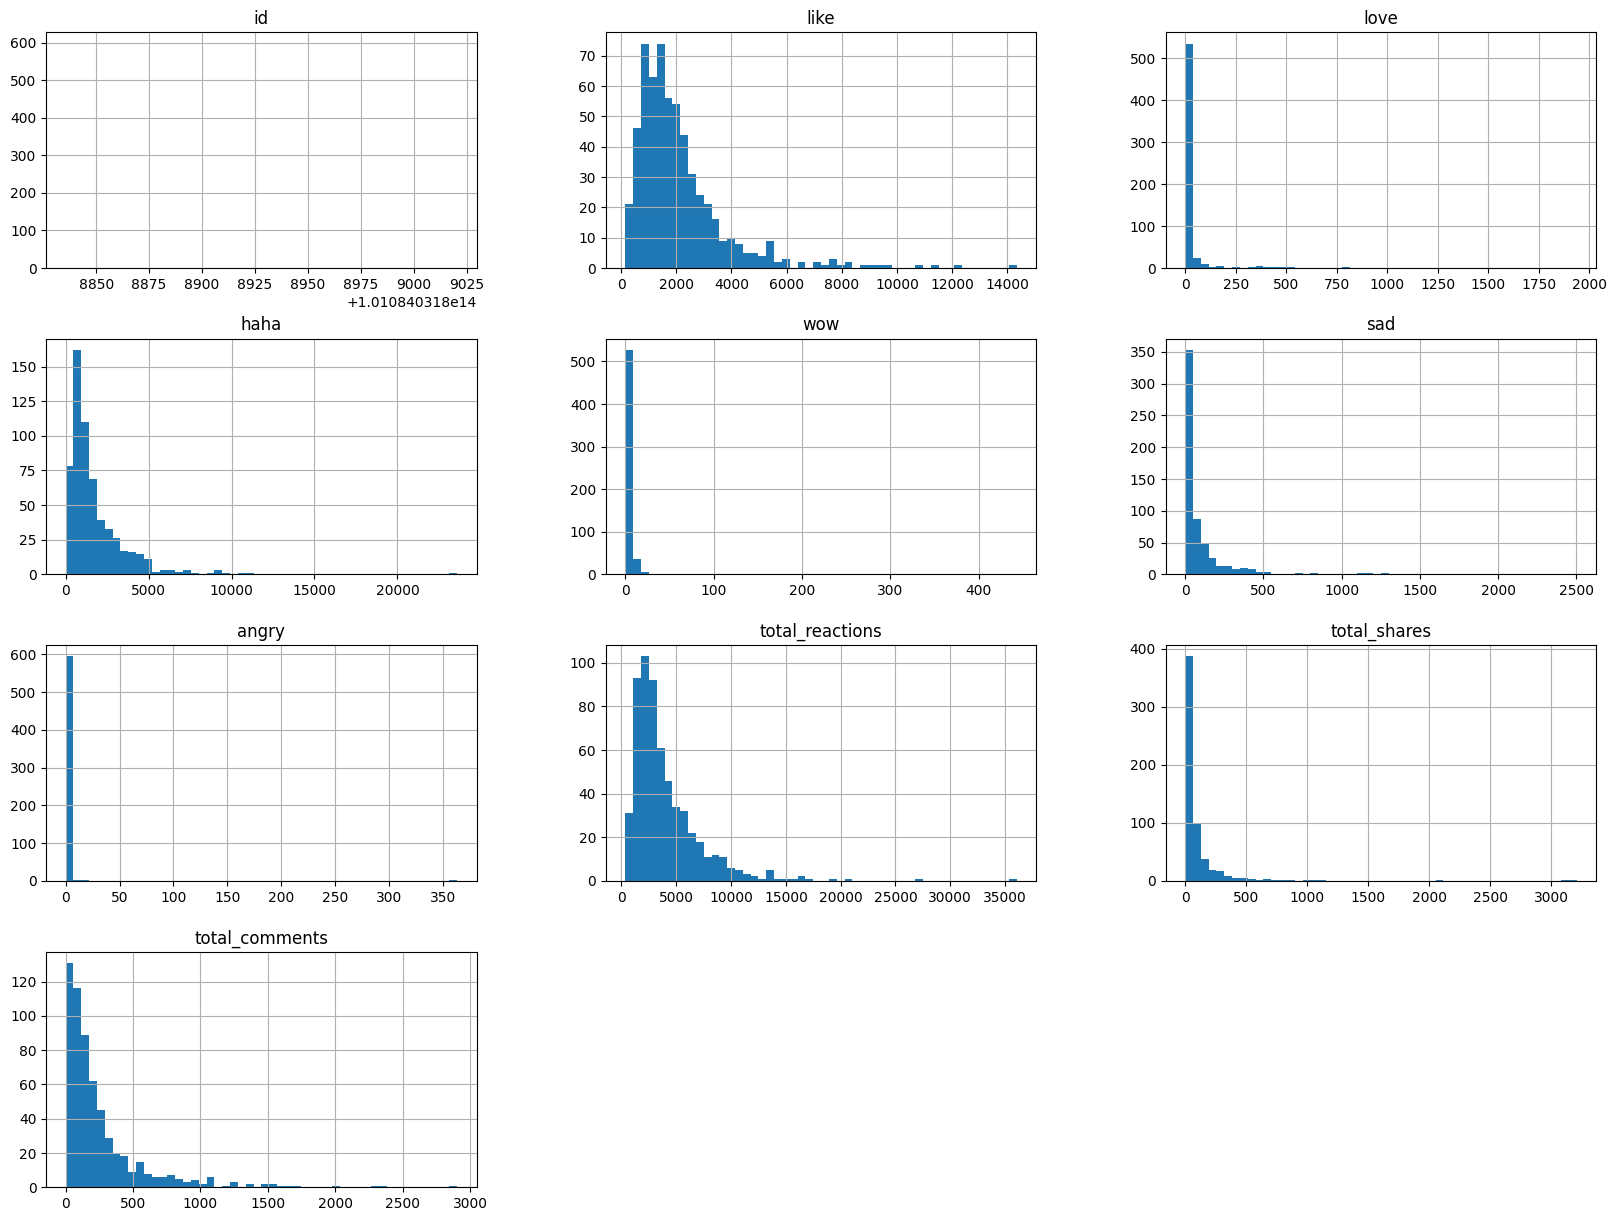

In [387]:
df_raw.hist(bins=50, figsize=(20, 15))

- Tất cả các cột dữ liệu số không có dữ liệu khuyết thiếu.
- Hầu như lượt tương tác được tập trung vào các loại: like, haha, sad và cả comment.
- Các cột còn lại có đều ở dạng lệnh phải.

##### Ý nghĩa của các cột

|Tên|Ý nghĩa|
|-|-|
|`"id"`| ID của người/trang đăng bài.
|`"name"`| Tên của người/trang đăng bài.
|`"id_post"`| ID của bài viết.
|`"created_time"`| Thời gian tạo bài viết.
|`"updated_time"`| Thời gian chỉnh sửa bài viết.
|`"message"`| Nội dung bài viết.
|`"type"`| kiểu của bài viết: status, photo, video.
|`"picture"`| Link hình ảnh hoặc thumbnail video của post.
|`"source"`| Link video của post nếu post là post video.
|`"properties"`| Object chứa thông tin chiều dài của video.
|`"like", "love", "haha", "wow", "sad", "angry", "total_reactions"`| Thông tin về các loại tương tác của bài viết.
|`"comments"`| Object chứa thông tin về người comment và comment của họ.
|`"total_shares"`| là số lượt share của bài viết.
|`"total_comments"`| Tổng số lượng comment của bài viết.

### 2. Làm sạch - tiền xử lý dữ liệu

##### Cột `properties` chỉ có dữ liệu khi nó có type là `video`

In [506]:
df_video = df_raw[df_raw['type'] == 'video']
count_prop = [len(eval(df_raw[df_raw['type'] == 'video'].iloc[0]['properties'])) for i in range(df_video.shape[0])]
print(count_prop)
print(df_video.iloc[0]['properties'])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[{'name': 'Length', 'text': '02:10'}]


In [507]:
df_raw.iloc[0]['properties']

nan

In [390]:
for i in df_raw['properties']:
	try:
		print(eval(i)[0]['text'], end='\t')
	except:
		pass

02:10	01:57	00:14	00:42	00:30	01:22	01:56	00:33	01:40	01:29	01:18	01:04	01:25	01:10	01:22	01:22	02:21	02:10	01:39	01:19	01:15	01:39	02:11	01:33	01:22	01:44	01:19	01:59	01:36	02:12	01:13	01:59	01:27	01:27	01:26	01:37	01:32	01:17	01:13	01:08	02:48	01:31	01:44	01:47	01:41	01:36	01:58	01:19	01:12	01:38	01:55	01:39	01:54	01:18	

- Ta thấy tất cả giá trị của cột `properties` chỉ có thuộc tính chiều dài nên ta có thể thay thế trực tiếp giá trị chiều dài video vào cột `properties`. 
- Tất cả giá trị đều chỉ có vài phút nên chuyển hết sang số giây.
- Ngoài ra những post kiểu status hay photo không có thuộc tính bị rỗng nên ta set giá trị cho nó = 0.
- Đổi tên `properties` thành `video_length` để thể hiện rõ ý nghĩa của dữ liệu.

In [508]:
df_clean = df_raw
def parse_time(x):
	try:
		dat = eval(x)[0]['text'].split(':')
		return 60 * int(dat[0]) + int(dat[1])
	except:
		return 0
df_clean['video_length'] = df_clean['properties'].map(lambda x: parse_time(x))
df_clean.drop('properties', axis=1, inplace=True)

In [509]:
df_clean.head()

id                name                          id_post  \
0  101084031778928  Biết thế éo đi làm  101084031778928_915132193952422   
1  101084031778928  Biết thế éo đi làm  101084031778928_915087943956847   
2  101084031778928  Biết thế éo đi làm  101084031778928_914694960662812   
3  101084031778928  Biết thế éo đi làm  101084031778928_914645237334451   
4  101084031778928  Biết thế éo đi làm  101084031778928_914608167338158   

               created_time              updated_time  \
0  2023-11-18T04:13:09+0000  2023-11-18T04:30:55+0000   
1  2023-11-18T02:16:00+0000  2023-11-18T04:21:21+0000   
2  2023-11-17T13:39:28+0000  2023-11-18T04:01:51+0000   
3  2023-11-17T12:15:30+0000  2023-11-18T02:48:05+0000   
4  2023-11-17T11:14:43+0000  2023-11-18T04:02:28+0000   

                                             message    type  \
0  Một ngày làm việc hiệu quả của người lương 5 t...   photo   
1  Khách vote 1 ⭐ vì nhắn lúc 3h sáng không nhân ...  status   
2  "Em yên tâm, chỉ có chị với bé Linh biết chuyệ...  status   
3  Người sếp khi nghe ứng viên nói: "Lương không ...   photo   
4  Thế giới đang chia ra thành 2 loại người: Mai ...  status   

                                             picture source  like  love  haha  \
0  https://scontent.fhan3-5.fna.fbcdn.net/v/t39.3...    NaN   293     3   204   
1                                                NaN    NaN   310     0   434   
2                                                NaN    NaN  1023     3  1128   
3  https://scontent.fhan3-2.fna.fbcdn.net/v/t39.3...    NaN   685     4   485   
4                                                NaN    NaN   755     2   310   

   wow  sad  angry                                           comments  \
0    0    6      0  [{'created_time': '2023-11-18T04:13:24+0000', ...   
1    1   18      0  [{'created_time': '2023-11-18T02:17:04+0000', ...   
2    0   14      0  [{'created_time': '2023-11-17T13:41:25+0000', ...   
3    2    6      0  [{'created_time': '2023-11-17T12:16:06+0000', ...   
4    3  105      1  [{'created_time': '2023-11-17T16:23:12+0000', ...   

   total_reactions  total_shares  total_comments  video_length  
0              506             3              19             0  
1              763             9              47             0  
2             2168            19             110             0  
3             1182             8              46             0  
4             1176            37             147             0

##### Cột `comments`

In [510]:
eval(df_clean['comments'][10])

[{'created_time': '2023-11-16T11:14:33+0000',
  'message': 'Chơi nhiệt tình vui vẻ quá nè :)))',
  'id': '913950664070575_1804049100030395',
  'reactions': 6,
  'from': {'id': '101084031778928',
   'name': 'Biết thế éo đi làm',
   'birthday': '02/24/1986',
   'location': {'street': 'SAO HỎA', 'zip': '10000'}}},
 {'created_time': '2023-11-17T01:28:03+0000',
  'message': 'Nè u Linh Anh',
  'id': '913950664070575_1409459539656353',
  'reactions': 0,
  'from': {'id': '100009623627804',
   'name': 'Nhi',
   'first_name': 'Nhi',
   'last_name': 'Nhi'}},
 {'created_time': '2023-11-16T14:24:20+0000',
  'message': 'Nguyễn Trang',
  'id': '913950664070575_717124926970450',
  'reactions': 0,
  'from': {'id': '100007609202285',
   'name': 'Thảo Meo',
   'first_name': 'Meo',
   'last_name': 'Thảo',
   'gender': 'female'}},
 {'created_time': '2023-11-17T01:38:31+0000',
  'message': 'Oanh Lan m mấy hôm nữa',
  'id': '913950664070575_214017824977161',
  'reactions': 1,
  'from': {'id': '10000418186611

Cột `comments` chứa rất nhiều dữ liệu nên nó khá lớn nên cần tách ra tạo dataframe khác và xóa cột `comments` đi.

In [511]:
all_comments = []
for i in range(df_clean.shape[0]):
	comments = df_clean.iloc[i]['comments']
	id_post = df_clean.iloc[i]['id_post']
	for comment in eval(comments):
		comment['id_post'] = id_post
		all_comments.append(comment)

In [512]:
all_comments[0].keys()

dict_keys(['created_time', 'message', 'id', 'reactions', 'from', 'id_post'])

In [529]:
df_comments = pd.DataFrame(data=all_comments, columns=all_comments[0].keys())

In [530]:
df_comments.head()

created_time                               message  \
0  2023-11-18T04:13:24+0000  Người đi làm thứ 7 là người khổ nhất   
1  2023-11-18T04:19:22+0000                              Hoàng Hà   
2  2023-11-18T04:23:45+0000                                    💛💛   
3  2023-11-18T04:14:49+0000         Ý Bí Đô sống vui sống khỏe   
4  2023-11-18T04:22:36+0000                             Thao Luna   

                                 id  reactions  \
0   915132193952422_363754546106175         15   
1   915132193952422_866692501621376          0   
2   915132193952422_858243455984411          0   
3  915132193952422_1045241863288045          1   
4  915132193952422_1468851163909899          0   

                                                from  \
0  {'id': '101084031778928', 'name': 'Biết thế éo...   
1  {'id': '100011487755546', 'name': 'Hằng Vũ', '...   
2  {'id': '112787931662446', 'name': 'LADY Fashio...   
3  {'id': '100008183580491', 'name': 'Sơn Huy', '...   
4  {'id': '100077727470896', 'name': 'Do Thi Linh...   

                           id_post  
0  101084031778928_915132193952422  
1  101084031778928_915132193952422  
2  101084031778928_915132193952422  
3  101084031778928_915132193952422  
4  101084031778928_915132193952422

In [531]:
df_comments.iloc[3]['from']

{'id': '100008183580491',
 'name': 'Sơn Huy',
 'first_name': 'Sơn',
 'last_name': 'Huy',
 'gender': 'male',
 'location': {'id': '109205905763791', 'name': 'Nha Trang'}}

Cột `from` có kiểu dữ liệu là 1 object nên ta cần tách dữ liệu này ra thành các cột mới

In [532]:
def getLocation(loc):
	if 'name' in loc.keys():
		return loc['name']

	_loc = []
	if 'street' in loc.keys():
		_loc.append(loc['street'])
	if 'city' in loc.keys():
		_loc.append(loc['city'])
	if 'country' in loc.keys():
		_loc.append(loc['country'])

	return ', '.join(_loc)

id_users = []
names = []
genders = []
locations = []
works = []
birthdays = []
for _from in df_comments['from']:
	id_users.append(_from['id'])
	names.append(_from['name'])
	if 'gender' in _from.keys():
		genders.append(_from['gender'])
	else:
		genders.append(np.nan)

	if 'location' in _from.keys():
		locations.append(getLocation(_from['location']))
	else:
		locations.append(np.nan)
	
	if 'work' in _from.keys():
		works.append(_from['work'][0]['employer']['name'])
	else:
		works.append(np.nan)

	if 'birthday' in _from.keys():
		birthdays.append(_from['birthday'])
	else:
		birthdays.append(np.nan)

In [399]:
locations

['SAO HỎA',
 nan,
 'K34 Lê Hữu Trác, Da Nang, Vietnam',
 'Nha Trang',
 nan,
 nan,
 'Hanoi, Vietnam',
 'Hanoi, Vietnam',
 nan,
 'Ho Chi Minh City, Vietnam',
 'Hung Yen, Hưng Yên, Vietnam',
 'Hanoi, Vietnam',
 'Hue, Vietnam',
 'Gia Lâm',
 'Tầng 5, Cityhouse, 485B Nguyễn Đình Chiểu, Phường 02, Quận 3',
 'Hanoi, Vietnam',
 'Hanoi, Vietnam',
 nan,
 nan,
 'SAO HỎA',
 'Hòa Bình, Hòa Bình, Vietnam',
 'Thanh Hóa',
 nan,
 'Da Nang, Vietnam',
 'Hai Phong, Vietnam',
 'Can Tho',
 'Hanoi, Vietnam',
 nan,
 'Hanoi, Vietnam',
 'Ho Chi Minh City, Vietnam',
 'Hanoi, Vietnam',
 'Chon Thanh',
 nan,
 'Nam Truc',
 'Hanoi, Vietnam',
 'Seoul, Korea',
 'Hanoi, Vietnam',
 'Hanoi, Vietnam',
 nan,
 nan,
 'Ha Long',
 'Tân An, Long An',
 nan,
 'Hanoi, Vietnam',
 'Ho Chi Minh City, Vietnam',
 'Brighton',
 'Viet Tri',
 'Ho Chi Minh City, Vietnam',
 nan,
 nan,
 'Nho Quan, Ninh Bình, Vietnam',
 'Ho Chi Minh City, Vietnam',
 nan,
 'Ho Chi Minh City, Vietnam',
 nan,
 'Chí Linh',
 'Hanoi, Vietnam',
 nan,
 'Hanoi, Vietnam',

In [400]:
count = [0 for i in range(10)]
for loc in locations:
	try:
		count[len(loc.split(','))] += 1
	except:
		count[0] += 1

print(list(enumerate(count)))

[(0, 36861), (1, 25193), (2, 45434), (3, 8672), (4, 93), (5, 146), (6, 46), (7, 25), (8, 0), (9, 0)]


- Dữ liệu `location` có nhiều dữ liệu giống nhau nhưng không được chuẩn hóa giống nhau ví dụ như: Hà Nội - Ha Noi - Hanoi. 
Hay có những địa chỉ có rõ street những đỉa chỉ không có như: 'Hanoi, Vietnam' và 'Ha Loi, Ha Noi, Vietnam'.
- Có những đỉa chỉ có tên quốc gia theo sau cùng và không có quốc gia.
- Hầu hết dữ liệu vị trí có từ 1 -> 3 phần tử, ta có thể chuẩn hóa dữ liệu `location` thành các dữ liệu chi tiết hơn như `street`, `city`, `country`.
- Các vị trí có 1 phần tử thường chỉ chứa tên thành phố(city). Vị trí có 2 phần tử thường chứa: thành phố(city) và quốc gia(country). Vị trí chứa 3 phần tử trở lên chứa địa chỉ chi tiểt như tên đường, thành phố và cả quốc gia. => Dữ liệu street chứa vị trí chi tiết bao gồm nhiều data khác biệt nhau nên có thể sẽ không cần thiết.

In [403]:
from_countries = []
from_cities = []
from_streets = []

def _append(a, b, c):
	from_countries.append(a)
	from_cities.append(b)
	from_streets.append(c)

for loc in locations:
	if str(loc) != 'nan':
		_locs = loc.split(', ')
		if len(_locs) == 1:
			_append(np.nan, _locs[0], np.nan)
		elif len(_locs) == 2:
			_append(_locs[-1], _locs[-2], np.nan)
		else:
			_append(_locs[-1], _locs[-2], ', '.join(_locs[:-2]))
	else:
		_append(np.nan, np.nan, np.nan)

In [404]:
pd.Series(np.asarray(from_countries)).unique()

array(['nan', 'Vietnam', 'Quận 3', 'Korea', 'Long An', 'China', 'Yunnan',
       'An Giang', 'Spain', 'Tokyo', 'Germany', 'California', 'Russia',
       'Arizona', 'Minnesota', 'Hyogo', 'United Kingdom', 'Taiwan',
       'Thailand', 'South Korea', 'United Arab Emirates', 'Philippines',
       'Indonesia', 'British Columbia', 'Taipei', 'Okayama',
       'New Zealand', 'Switzerland', 'Washington', 'Czech Republic',
       'France', 'Australia', 'Aomori', 'Ontario', 'Malaysia', 'New York',
       'Osaka', 'Texas', 'Kumamoto', 'Oregon', 'Iwate', 'Ibaraki',
       'Fukui', 'Saitama', 'Taoyuan', 'Pakistan', 'Toyama', 'Kanagawa',
       'Hong Kong', 'Japan', 'Hà Nội', 'Bắc Giang', 'Fukushima', 'Chiba',
       'Việt Nam', 'Nara', 'Bạc Liêu (Vincom cũ)', 'Zimbabwe',
       'Rajasthan', 'Iran', 'Missouri', 'Uttar Pradesh', 'India', 'Aichi',
       'Hanoi', 'Illinois', 'Saskatchewan', 'Laos',
       'Australian Capital Territory', 'Mie', 'Colorado', 'Phường An Lạc',
       'Saudi Arabia', 'Manito

Cách tách dữ liệu trên trả về kêt quả không chính xác bởi vì có quá nhiều dữ liệu không chuẩn.
Để khắc phục nó ta có thể sử dụng thư viện geopy của python để xử lí chuẩn hóa lại dữ liệu vị trí để có thể thực hiện lấy ra tên thành phố và tên quốc gia

In [405]:
%pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_app")

In [407]:
unique_loc = list(pd.Series(locations).unique())

In [32]:
standardize_loc = {}
for loc in unique_loc:
	if str(i) != 'nan':
		try:
			location = geolocator.geocode(loc)
			standardize_loc[loc] = str(location)
		except:
			standardize_loc[loc] = "None"
			print(loc)

B'Sar Dong, Lâm Ðồng, Vietnam
TP.HCM, Ho Chi Minh City, Vietnam
Dong Co Ki, An Giang, Vietnam
Ã?Uc Tho, Hà Tĩnh, Vietnam
Ap Binh Ta (2), Long An, Vietnam
Ba Vì, Ha Son Binh, Vietnam
39 Đường Số 17 Khu Phố 6 Hiệp Bình Chánh TP.Thủ Đức, Ho Chi Minh City, Vietnam
Lang Met, Lạng Sơn, Vietnam
Phường Sông Bằng, Cao Bang, Vietnam
Ng. 322 Đ. Mỹ Đình, Mỹ Đình 1, Nam Từ Liêm, Hà Nội, Hanoi, Vietnam
Ap Binh Hoa (1), Song Be, Vietnam
Sông-Bé, Song Be, Vietnam
11 Đoàn Văn Bơ, Phường 12, Quận 4, Thành phố Hồ Chí Minh, Việt Nam, Ho Chi Minh City, Vietnam
Quận 9
37/17/50 Hà Huy Giáp, Phường Thạnh Lộc, Quận 12, Ho Chi Minh City, Vietnam
Ã?On Duong, Lâm Ðồng, Vietnam
Hoi An, Quang Nam-Da Nang, Vietnam
Binh Chuan, Song Be, Vietnam
Số 14, ngõ 43 Võng Thị, Tây Hồ, Hà Nội, Hanoi, Vietnam
Na Rì (1), Bac Thai, Vietnam
Mân Quan (1), Quang Nam-Da Nang, Vietnam
Tp Hồ Chí Minh, Ho Chi Minh City, Vietnam
120/33/6 Trường Chinh.Phường 12.Tân Bình, Ho Chi Minh City, Vietnam
Quận 7, Ho Chi Minh City, Vietnam
Da Dang, 

In [33]:
for _key, _value in standardize_loc.items():
	if _value == 'None':
		print(_key)

Tầng 5, Cityhouse, 485B Nguyễn Đình Chiểu, Phường 02, Quận 3
Phu Dien Chau, Nghệ An, Vietnam
8xbet- hỗ trợ,hà nội, Hanoi, Vietnam
Hoa Mac, Ha Nam Ninh, Vietnam
Angiang, An Giang, Vietnam
Cẩm Phả Port, Quảng Ninh, Vietnam
Dinh Hoi, Ha Nam Ninh, Vietnam
B'Sar Dong, Lâm Ðồng, Vietnam
My Loc, Ha Nam Ninh, Vietnam
Kha Phong, Ha Nam Ninh, Vietnam
TP.HCM, Ho Chi Minh City, Vietnam
Bao Thang, Hoang Lien Son, Vietnam
Yen Nguu, Ha Noi, Vietnam
Số 6 / 212 Hoàng Quốc Việt, Hanoi, Vietnam
Buôn Ma Thuột, Đắc Lắk, Vietnam
Vietri, Phú Thọ, Vietnam
Xa Dau Giay, Vietnam
Ã?Ong Trieu, Quảng Ninh, Vietnam
Hòa Dinh, Ha Nam Ninh, Vietnam
Quang Ninh, Binh Tri Thien, Vietnam
Buôn Krông Bông, Đắc Lắk, Vietnam
Hương Ngọc Lac, Thanh Hóa, Vietnam
Tong Xa, Ha Nam Ninh, Vietnam

LK34 - Đa Sỹ - Hà Đông, Hanoi, Vietnam
Buôn Dru Dak Mam, Đắc Lắk, Vietnam
Dong Co Ki, An Giang, Vietnam
Sóc Sa Rài, Ðồng Tháp, Vietnam
Chuyen Thien, Ha Nam Ninh, Vietnam
Muc Son Ngoai, Thanh Hóa, Vietnam
Hiep Hoa, Hi Bac, Vietnam
Gò Dầu Hạ, 

Vẫn còn nhiều data bị sai do thư viện không tra được vị trí, ta cần xử lí tiếp

In [34]:
for _key, _value in standardize_loc.items():
	if _value == 'None':
		try:
			locs = _key.split(',')

			location = geolocator.geocode(', '.join([locs[-2], locs[-1]]))
			print(location)
			standardize_loc[_key] = str(location)
		except:
			pass

Phường Võ Thị Sáu, Quận 3, Thành phố Hồ Chí Minh, 70001, Việt Nam
Tỉnh Nghệ An, Việt Nam
Thành phố Hà Nội, Việt Nam
Ninh Hạ, Xã Nam Ninh, Huyện Cát Tiên, Tỉnh Lâm Đồng, Việt Nam
Tỉnh An Giang, Việt Nam
Tỉnh Quảng Ninh, Việt Nam
Ninh Hạ, Xã Nam Ninh, Huyện Cát Tiên, Tỉnh Lâm Đồng, Việt Nam
Tỉnh Lâm Đồng, Việt Nam
Ninh Hạ, Xã Nam Ninh, Huyện Cát Tiên, Tỉnh Lâm Đồng, Việt Nam
Ninh Hạ, Xã Nam Ninh, Huyện Cát Tiên, Tỉnh Lâm Đồng, Việt Nam
Thành phố Hồ Chí Minh, Việt Nam
Hoàng Liên, Huyện Phong Thổ, Tỉnh Lai Châu, Việt Nam
Thành phố Hà Nội, Việt Nam
Thành phố Hà Nội, Việt Nam
None
Tỉnh Phú Thọ, Việt Nam
None
Tỉnh Quảng Ninh, Việt Nam
Ninh Hạ, Xã Nam Ninh, Huyện Cát Tiên, Tỉnh Lâm Đồng, Việt Nam
TH - Thiên An - - Phú Hm00 - Ninh Hòa, Quốc lộ 26, Ninh Phụng, Thị xã Ninh Hòa, Tỉnh Khánh Hòa, Việt Nam
None
Tỉnh Thanh Hóa, Việt Nam
Ninh Hạ, Xã Nam Ninh, Huyện Cát Tiên, Tỉnh Lâm Đồng, Việt Nam
Thành phố Hà Nội, Việt Nam
None
Tỉnh An Giang, Việt Nam
Tỉnh Đồng Tháp, Việt Nam
Ninh Hạ, Xã Nam Ninh, Hu

In [36]:
for _key, _value in standardize_loc.items():
	if _value == 'None':
		print(_key)

Buôn Ma Thuột, Đắc Lắk, Vietnam
Xa Dau Giay, Vietnam
Buôn Krông Bông, Đắc Lắk, Vietnam

Buôn Dru Dak Mam, Đắc Lắk, Vietnam
Cheo Reo
Buôn Hô, Đắc Lắk, Vietnam
Lagi, Thuin Hai, Vietnam
Bâc Ruông, Thuin Hai, Vietnam
Tra Tan, Thuin Hai, Vietnam
39 Đường Số 17 Khu Phố 6 Hiệp Bình Chánh TP.Thủ Đức, Ho Chi Minh City, Vietnam
Gia An, Thuin Hai, Vietnam
L3-05, TTTM Vincom, Khóm 1, Bạc Liêu (Vincom cũ)
Ban M'Drack, Đắc Lắk, Vietnam
Buôn Nui, Đắc Lắk, Vietnam
Quận 9
Buôn Phoke, Đắc Lắk, Vietnam
Buôn Buôr (2), Đắc Lắk, Vietnam
Bokeo, Rotanokiri, Cambodia
Buôn Krông Buk, Đắc Lắk, Vietnam
Pleikù Tông, Gia Lai-Cong Tum, Vietnam
Lak, Đắc Lắk, Vietnam
Ban Krong Pack, Đắc Lắk, Vietnam
Phan Ri Cua, Thuin Hai, Vietnam
Bon Bu Bo Dak Nong, Đắc Lắk, Vietnam
Buon Trap, Đắc Lắk, Vietnam
Ban Dak, Đắc Lắk, Vietnam
Buôn Krông Pach, Đắc Lắk, Vietnam
Buôn Mrông (1), Đắc Lắk, Vietnam
Phuoc An, Đắc Lắk, Vietnam
Võ Xu, Thuin Hai, Vietnam
La Canh Dong, Vietnam
Buon A Rieng, Đắc Lắk, Vietnam
415 Hoàng Văn Thụ P2 Q TB tp

In [37]:
for _key, _value in standardize_loc.items():
	if 'Đắc Lắk' in str(_key):
		standardize_loc[_key] = 'Tỉnh Đắc Lắk, Việt Nam'
	elif 'Thuin Hai' in str(_key):
		standardize_loc[_key] = 'Tỉnh Ninh Thuân, Việt Nam'
	elif 'Gia Lai-Cong Tum' in str(_key):
		standardize_loc[_key] = 'Pleiku, Tỉnh Gia Lai, 61111, Việt Nam'
	elif 'Ho Chi Minh' in str(_key):
		standardize_loc[_key] = 'Thành phố Hồ Chí Minh, Việt Nam'

In [38]:
for _key, _value in standardize_loc.items():
	if _value == 'None':
		print(_key)

Xa Dau Giay, Vietnam

Cheo Reo
L3-05, TTTM Vincom, Khóm 1, Bạc Liêu (Vincom cũ)
Quận 9
Bokeo, Rotanokiri, Cambodia
La Canh Dong, Vietnam
415 Hoàng Văn Thụ P2 Q TB tphcm
Ap Thoi Hung (1), Vietnam
Ap An Vieng, Vietnam
Vĩnh tuy, Yen Nguu, Vietnam
Yishun New Town, Singapore
Soeul, Hwanghae-Bukto, Korea
Březnice (Příbram District)


In [412]:
standardize_loc['Cheo Reo'] = 'Pleiku, Tỉnh Gia Lai, 61111, Việt Nam'
standardize_loc['Xa Dau Giay, Vietnam'] = 'Tỉnh Đồng Nai, Việt Nam'
standardize_loc['Quận 9'] = 'Thành phố Hồ Chí Minh, Việt Nam'
standardize_loc['Bokeo, Rotanokiri, Cambodia'] = 'Rotanokiri, Cambodia',
standardize_loc['La Canh Dong, Vietnam'] = 'Tỉnh Đồng Nai, Việt Nam'
standardize_loc['415 Hoàng Văn Thụ P2 Q TB tphcm'] = 'Thành phố Hồ Chí Minh, Việt Nam'
standardize_loc['Ap Thoi Hung (1), Vietnam'] = 'Tỉnh Cần Thơ, Việt Nam'
standardize_loc['Ap An Vieng, Vietnam'] = 'Tỉnh Đồng Nai, Việt Nam'
standardize_loc['Vĩnh tuy, Yen Nguu, Vietnam'] = 'Thành phố Hà Nội, Việt Nam'
standardize_loc['Yishun New Town, Singapore'] = 'Yishun New Town, Singapore'
standardize_loc['Soeul, Hwanghae-Bukto, Korea'] = 'Soeul, Korea'
standardize_loc['L3-05, TTTM Vincom, Khóm 1, Bạc Liêu (Vincom cũ)'] = 'Tỉnh Bạc Liêu'
standardize_loc['Březnice (Příbram District)'] = 'Březnice, okres Příbram, Střední Čechy, 262 72, Česko'
standardize_loc['SAO HỎA'] = 'Other, Other'
standardize_loc[np.nan] = "Other, Other"

Vì api trả về tên các vị trí theo ngôn ngữ của quốc gia đó nên ta cần chuẩn hóa nó về ngôn ngữ Việt Nam để dễ dàng phân tích.

In [498]:
import translators as ts
from langdetect import detect
loc_convert_error = []
for _key, _value in standardize_loc.items():
	if str(_value) != 'Other, Other' and 'Việt Nam' not in str(_value) and detect(str(_value)) != 'vi':
		try:
			standardize_loc[_key] = ts.translate_text(str(_value), to_language='vi')
		except:
			loc_convert_error.append(standardize_loc[_key])
			print(standardize_loc[_key])

In [533]:
from_countries = []
from_cities = []

def _append(a, b):
	from_countries.append(a)
	from_cities.append(b)

for loc in locations:
	try:
		a = standardize_loc[loc].split(',')
		ct, ctr = '', ''
		if len(a) == 0:
			ct, ctr = np.nan, np.nan
		elif len(a) == 1:
			ct, ctr = a[0].strip(), np.nan
		elif a[-2].strip().isnumeric():
			ct, ctr = a[-3].strip(), a[-1].strip()
		else:
			ct, ctr = a[-2].strip(), a[-1].strip()
	except:
		ct, ctr = np.nan, np.nan
	_append(ctr, ct)


In [534]:
df_comments['id_user'] = id_users
df_comments['name'] = names
df_comments['birthday'] = birthdays
df_comments['gender'] = genders
df_comments['city'] = from_cities
df_comments['country'] = from_countries
df_comments['work'] = works
df_comments.drop(columns='from', inplace=True)

In [518]:
df_clean.drop(columns='comments', inplace=True)

In [63]:
df_clean.to_csv('./Data/598_data_clean.csv')
df_clean.head()

id                name                          id_post  \
0  101084031778928  Biết thế éo đi làm  101084031778928_915132193952422   
1  101084031778928  Biết thế éo đi làm  101084031778928_915087943956847   
2  101084031778928  Biết thế éo đi làm  101084031778928_914694960662812   
3  101084031778928  Biết thế éo đi làm  101084031778928_914645237334451   
4  101084031778928  Biết thế éo đi làm  101084031778928_914608167338158   

               created_time              updated_time  \
0  2023-11-18T04:13:09+0000  2023-11-18T04:30:55+0000   
1  2023-11-18T02:16:00+0000  2023-11-18T04:21:21+0000   
2  2023-11-17T13:39:28+0000  2023-11-18T04:01:51+0000   
3  2023-11-17T12:15:30+0000  2023-11-18T02:48:05+0000   
4  2023-11-17T11:14:43+0000  2023-11-18T04:02:28+0000   

                                             message    type  \
0  Một ngày làm việc hiệu quả của người lương 5 t...   photo   
1  Khách vote 1 ⭐ vì nhắn lúc 3h sáng không nhân ...  status   
2  "Em yên tâm, chỉ có chị với bé Linh biết chuyệ...  status   
3  Người sếp khi nghe ứng viên nói: "Lương không ...   photo   
4  Thế giới đang chia ra thành 2 loại người: Mai ...  status   

                                             picture source  like  love  haha  \
0  https://scontent.fhan3-5.fna.fbcdn.net/v/t39.3...    NaN   293     3   204   
1                                                NaN    NaN   310     0   434   
2                                                NaN    NaN  1023     3  1128   
3  https://scontent.fhan3-2.fna.fbcdn.net/v/t39.3...    NaN   685     4   485   
4                                                NaN    NaN   755     2   310   

   wow  sad  angry  total_reactions  total_shares  total_comments  \
0    0    6      0              506             3              19   
1    1   18      0              763             9              47   
2    0   14      0             2168            19             110   
3    2    6      0             1182             8              46   
4    3  105      1             1176            37             147   

   video_length  
0             0  
1             0  
2             0  
3             0  
4             0

#### Xử lý missing data

In [715]:
df_comments.shape

(116470, 13)

In [536]:
df_comments.isna().sum()

created_time        0
message             0
id                  0
reactions           0
id_post             0
id_user             0
name                0
birthday        93753
gender          46592
city                0
country            90
work            81996
dtype: int64

Cột `gender`, `birthday` và `work` có số dữ liệu bị miss khá nhiều.
Trong đó 2 cột `birthday` và `work` rất khó để có thể sử dụng dữ liệu các cột khác để thay thế được nên ta sẽ bỏ 2 cột này đi.

In [544]:
df_comments.drop(labels='birthday', axis=1, inplace=True)
df_comments.drop(labels='work', axis=1, inplace=True)

##### Xử lý cột `gender`

In [537]:
print("Nữ:", df_comments['gender'].value_counts()['female'])
print("Nam:", df_comments['gender'].value_counts()['male'])
print("Không xác định:", df_comments['gender'].isna().sum())
print("Tổng:", df_comments['gender'].shape[0])

Nữ: 56493
Nam: 13385
Không xác định: 46592
Tổng: 116470


Số lượng dữ liệu giới tính không xác định chiếm 40% tổng số dữ liệu nên không thể thực hiện thay thế dữ liệu này bằng dữ liệu xung quanh được. Ta có thể từ tên của người comment để xác định giới tính của họ.

##### Thực hiện dự đoán giới tính thông qua tên

In [538]:
df_gender_nan = df_comments[pd.isna(df_comments['gender'])][['name', 'gender', 'id']]
df_gender_not_nan = df_comments[pd.notna(df_comments['gender'])][['name', 'gender']]

x_feature = df_gender_not_nan['name']
y = df_gender_not_nan['gender']
print(df_gender_nan.shape)
print(df_gender_not_nan.shape)

(46592, 3)
(69878, 2)


In [539]:
cv = CountVectorizer()
x = cv.fit_transform(x_feature)

In [540]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [541]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9276617057813394

In [542]:
vect = cv.transform(df_gender_nan['name']).toarray()
output = clf.predict(vect)
output_gender = {}
for i in range(df_gender_nan.shape[0]):
	output_gender[df_gender_nan.iloc[i]['id']] = output[i]

In [543]:
genders = []
for i in range(df_comments.shape[0]):
	if pd.isna(df_comments.iloc[i]['gender']):
		genders.append(output_gender[df_comments.iloc[i].id])
	else:
		genders.append(df_comments.iloc[i]['gender'])
df_comments['gender'] = pd.Series(genders)
df_comments['gender'].value_counts()

gender
female    94626
male      21844
Name: count, dtype: int64

##### Xử lý cột `message`, `country`, `city`

In [545]:
df_comments['message'] = df_comments['message'].fillna('')
df_comments['country'] = df_comments['country'].fillna("Other")
df_comments['city'] = df_comments['city'].fillna("Other")

In [546]:
df_comments.isna().sum()

created_time    0
message         0
id              0
reactions       0
id_post         0
id_user         0
name            0
gender          0
city            0
country         0
dtype: int64

In [34]:
df_comments.describe()

reactions       id_user
count  116470.000000  1.164700e+05
mean        0.860780  1.203745e+14
std        20.315754  1.517421e+15
min         0.000000  1.030175e+07
25%         0.000000  1.000070e+14
50%         0.000000  1.000153e+14
75%         1.000000  1.000448e+14
max      5869.000000  1.221118e+17

In [547]:
df_comments.to_csv("./Data/598_data_comments.csv")

### 3. Phân tích dữ liệu

In [4]:
df_clean = pd.read_csv("./Data/598_data_clean.csv", index_col='Unnamed: 0')
df_comments = pd.read_csv("./Data/598_data_comments.csv", index_col='Unnamed: 0')

#### Giải thích dữ liệu

##### Posts

In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 0 to 597
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               598 non-null    int64 
 1   name             598 non-null    object
 2   id_post          598 non-null    object
 3   created_time     598 non-null    object
 4   updated_time     598 non-null    object
 5   message          598 non-null    object
 6   type             598 non-null    object
 7   picture          359 non-null    object
 8   source           54 non-null     object
 9   like             598 non-null    int64 
 10  love             598 non-null    int64 
 11  haha             598 non-null    int64 
 12  wow              598 non-null    int64 
 13  sad              598 non-null    int64 
 14  angry            598 non-null    int64 
 15  total_reactions  598 non-null    int64 
 16  total_shares     598 non-null    int64 
 17  total_comments   598 non-null    int64 


|Tên cột			|Kiểu dữ liệu |Nội dung|
|-------------------|-------------|--------|
|`id`          		|int          |ID tác giả
|`name`        		|str          |Tên tác giả
|`id_post`	   		|str          |ID bài viết
|`created_time`		|str 		  |Thời gian tạo
|`updated_time`		|str          |Thời gian chỉnh sửa
|`message`     		|str          |Nội dung bài viết
|`type`        		|str          |Kiểu của bài viết(photo\status\video)
|`picture`     		|str          |Link hình ảnh
|`source`      		|str          |Link video
|`like`        		|int          |Số lượng like
|`love`        		|int          |Số lượng love
|`haha`        		|int          |Số lượng haha
|`wow`         		|int          |Số lượng wow
|`sad`         		|int          |Số lượng sad
|`angry`       		|int          |Số lượng angry
|`total_reactions`	|int          |Tổng số lượng cảm xúc 
|`total_shares`      		|int          |Số lượng share của bài viết
|`total_comments` 	|int          |Tổng số lượng bình luận
|`video_length`   	|int (seconds)|Chiều dài video (nếu có)

##### Comments

In [77]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116470 entries, 0 to 116469
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   created_time  116470 non-null  object
 1   message       114943 non-null  object
 2   id            116470 non-null  object
 3   reactions     116470 non-null  int64 
 4   id_post       116470 non-null  object
 5   id_user       116470 non-null  int64 
 6   name          116470 non-null  object
 7   gender        116470 non-null  object
 8   city          116436 non-null  object
 9   country       116470 non-null  object
dtypes: int64(2), object(8)
memory usage: 9.8+ MB


|Tên cột			|Kiểu dữ liệu |Nội dung|
|-------------------|-------------|--------|
|`created_time`		|str 		  |Thời gian tạo
|`message`			|str          |Nội dung bình luận
|`id`     			|str          |ID bình luận 
|`reactions`        |int          |Tổng số like/love...
|`id_post`    		|str          |ID bài viết
|`id_user`   		|int          |ID người dùng
|`name`   			|int          |Tên người dùng
|`gender`   	  	|str          |Giới tính người dùng(female/male)
|`city`   			|str          |Thành phố của người dùng
|`country`	  		|str          |Nước của người dùng

#### Tương quan về các loại post

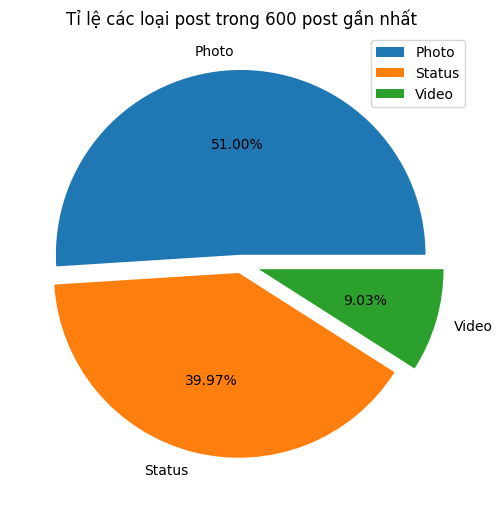

In [884]:
df_type_of_post = df_clean.groupby('type')['created_time'].count()
plt.figure(figsize=(6, 6))
plt.pie(df_type_of_post, explode=(0.05, 0.05, 0.1), labels=['Photo', 'Status', 'Video'], autopct="%1.2f%%")
plt.title("Tỉ lệ các loại post trong 600 post gần nhất")
plt.legend()
plt.show()

#### Bài viết có tổng lượng reaction cao nhất

In [185]:
post_wtmost_reaction = df_clean[df_clean['total_reactions'] == df_clean['total_reactions'].max()].iloc[0]
print("ID:", post_wtmost_reaction['id_post'])
print("Thời gian đăng bài:", post_wtmost_reaction['created_time'])
print("Số lượt like:", post_wtmost_reaction['total_reactions'])
print("Số lượt comment:", post_wtmost_reaction['total_comments'])
print("Số lượt share:", post_wtmost_reaction['total_shares'])
print("Thể loại:", post_wtmost_reaction['type'])
print("Nội dung:\n" + post_wtmost_reaction['message'])

ID: 101084031778928_890943993037909
Thời gian đăng bài: 2023-10-13T12:09:36+0000
Số lượt like: 36069
Số lượt comment: 1101
Số lượt share: 630
Thể loại: photo
Nội dung:
Bịa CV lố xong cái được nhận:


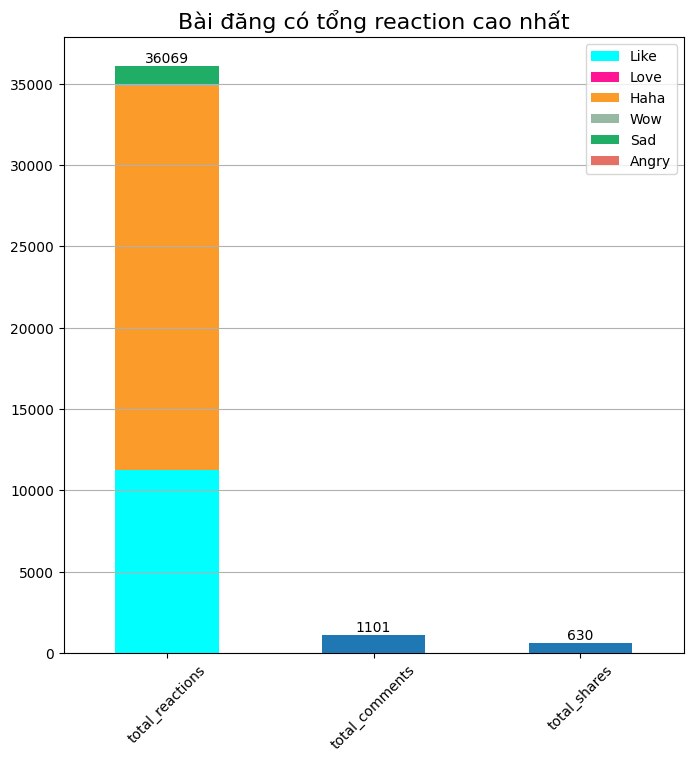

In [165]:
a = post_wtmost_reaction[['like', 'love', 'haha', 'wow', 'sad', 'angry', 'total_reactions', 'total_shares', 'total_comments']]
plt.figure(figsize=(8, 8))
a[['total_reactions', 'total_comments', 'total_shares']].plot(kind='bar', label='', rot=45)

plt.bar(x=0, height=a['like'], width=0.5, color='cyan', label="Like")
plt.bar(x=0, height=a['love'], width=0.5, color='deeppink', bottom=a['like'], label='Love')
plt.bar(x=0, height=a['haha'], width=0.5, color='#fb9b2a', bottom=(a['like'] + a['love']), label='Haha')
plt.bar(x=0, height=a['wow'], width=0.5, color='#97b8a3', bottom=(a['like'] + a['love'] + a['haha']), label='Wow')
plt.bar(x=0, height=a['sad'], width=0.5, color='#20ad65', bottom=(a['like'] + a['love'] + a['haha'] + a['wow']), label='Sad')
plt.bar(x=0, height=a['angry'], width=0.5, color='#e57066', bottom=(a['like'] + a['love'] + a['haha'] + a['wow'] + a['sad']), label='Angry')

plt.annotate(str(a['total_reactions']), (0, a['total_reactions']+200), ha='center')
plt.annotate(str(a['total_comments']), (1, a['total_comments']+200), ha='center')
plt.annotate(str(a['total_shares']), (2, a['total_shares']+200), ha='center')


plt.legend()
plt.title("Bài đăng có tổng reaction cao nhất", fontdict={'size': 16})
plt.grid(axis='y')

##### Top bình luận trong bài viết

In [86]:
df_comments[df_comments['id_post'] == post_wtmost_reaction['id_post']].sort_values('reactions', ascending=False).head()

created_time                                      message  \
47895  2023-10-13T12:18:14+0000    CV thì OK, thứ duy nhất không OK là tôi 😞   
47894  2023-10-13T12:10:22+0000  H ngta phát hiện thì có bị đuổi khong nhỉ 😞   
48196  2023-10-15T11:23:10+0000               Hiep Huynh Võ An Khánh Ng Kiet   
48076  2023-10-17T10:57:03+0000                         Minh Nguyệt Nguyệt à   
48297  2023-10-14T18:46:32+0000    Nguyễn Mai PhươngHằng Babie ko sao ko sao   

                                     id  reactions  \
47895   890943993037909_366378902402616        758   
47894   890943993037909_239912028730855        351   
48196  890943993037909_1489960351769116          2   
48076   890943993037909_285364100989262          2   
48297   890943993037909_855273889479182          2   

                               id_post          id_user                name  \
47895  101084031778928_890943993037909  101084031778928  Biết thế éo đi làm   
47894  101084031778928_890943993037909  101084031778928  Biết thế éo đi làm   
48196  101084031778928_890943993037909  100023046368229           Huỳnh Nam   
48076  101084031778928_890943993037909  100013407339313    Nguyễn Thị Thanh   
48297  101084031778928_890943993037909  100006784803266   Nhung Thanh Nhung   

       gender                   city   country  
47895    male                SAO HỎA    Others  
47894    male                SAO HỎA    Others  
48196    male  Thành phố Hồ Chí Minh  Việt Nam  
48076  female  Thành phố Hồ Chí Minh  Việt Nam  
48297  female  Thành phố Hồ Chí Minh  Việt Nam

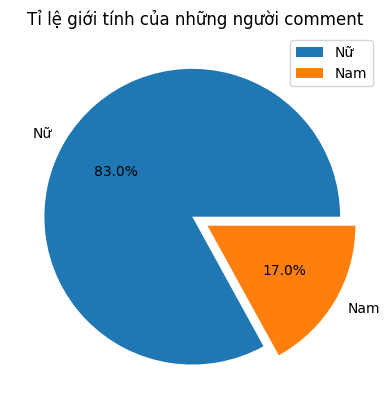

In [172]:
plt.pie(df_comments[df_comments['id_post'] == post_wtmost_reaction['id_post']]['gender'].value_counts(), autopct = '%1.1f%%', explode=(0.02, 0.1), labels=["Nữ", "Nam"])
plt.title("Tỉ lệ giới tính của những người comment")
plt.legend()

Có 2/5 bình luận đến từ chính chủ page có nhiều lượt tương tác nhất

#### Bài viết có số comment nhiều nhất

In [184]:
post_wtmost_comment = df_clean[df_clean['total_comments'] == df_clean['total_comments'].max()].iloc[0]
print("ID:", post_wtmost_comment['id_post'])
print("Thời gian đăng bài:", post_wtmost_comment['created_time'])
print("Số lượt like:", post_wtmost_comment['total_reactions'])
print("Số lượt comment:", post_wtmost_comment['total_comments'])
print("Số lượt share:", post_wtmost_comment['total_shares'])
print("Thể loại:", post_wtmost_comment['type'])
print("Nội dung:\n" + post_wtmost_comment['message'])

ID: 101084031778928_864423602356615
Thời gian đăng bài: 2023-09-07T13:32:53+0000
Số lượt like: 3767
Số lượt comment: 2902
Số lượt share: 39
Thể loại: photo
Nội dung:
Làm mẹ khó lắm, phải đâu chuyện đùa 🙄 1 bên sếp hối deadline, 1 bên con quấy tưng bừng khiến người làm mẹ cả ngày cứ bụng dạ nôn nao, tâm trí rối bời. 

Để không quạo con, bật sếp, mẹ trẻ cần nạp Probi Happi mỗi ngày, đảm bảo dạ êm ái, tâm thư thái bình tĩnh giải quyết từ việc công đến việc tư. 

Vì trong Probi Happi có chứa 104 tỷ lợi khuẩn từ Châu Âu giúp khỏe đường ruột có Tryptophan sinh ra hoạt chất hạnh phúc làm làm thư thái tinh thần. Mọi người cứ chi mạnh tay chất đầy tủ lạnh các lốc Probi Happi nhé!

#ProbiHappi #Khoeduongruot #Thuthaitinhthan


In [175]:
comments = df_comments[df_comments['id_post'] == post_wtmost_comment['id_post']]

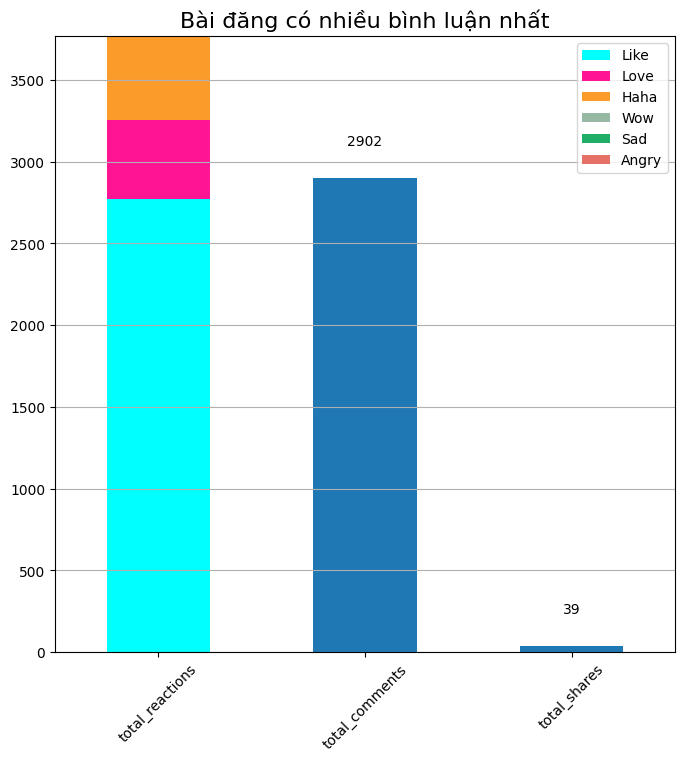

In [182]:
a = post_wtmost_comment[['like', 'love', 'haha', 'wow', 'sad', 'angry', 'total_reactions', 'total_shares', 'total_comments']]
plt.figure(figsize=(8, 8))
a[['total_reactions', 'total_comments', 'total_shares']].plot(kind='bar', label='', rot=45)

plt.bar(x=0, height=a['like'], width=0.5, color='cyan', label="Like")
plt.bar(x=0, height=a['love'], width=0.5, color='deeppink', bottom=a['like'], label='Love')
plt.bar(x=0, height=a['haha'], width=0.5, color='#fb9b2a', bottom=(a['like'] + a['love']), label='Haha')
plt.bar(x=0, height=a['wow'], width=0.5, color='#97b8a3', bottom=(a['like'] + a['love'] + a['haha']), label='Wow')
plt.bar(x=0, height=a['sad'], width=0.5, color='#20ad65', bottom=(a['like'] + a['love'] + a['haha'] + a['wow']), label='Sad')
plt.bar(x=0, height=a['angry'], width=0.5, color='#e57066', bottom=(a['like'] + a['love'] + a['haha'] + a['wow'] + a['sad']), label='Angry')

plt.annotate(str(a['total_reactions']), (0, a['total_reactions']+200), ha='center')
plt.annotate(str(a['total_comments']), (1, a['total_comments']+200), ha='center')
plt.annotate(str(a['total_shares']), (2, a['total_shares']+200), ha='center')


plt.legend()
plt.title("Bài đăng có nhiều bình luận nhất", fontdict={'size': 16})
plt.grid(axis='y')

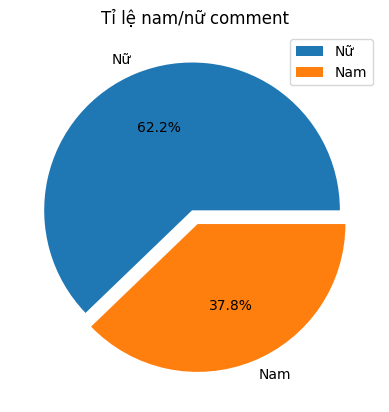

In [181]:
comments['gender'].value_counts().plot(kind='pie', title="Tỉ lệ nam/nữ comment", explode=(0.05, 0.05), autopct="%1.1f%%", labels=["Nữ", "Nam"], xlabel='', ylabel='')
plt.legend()

Lượng tương tác có cách biệt rõ rệt giữa nam và nữ.

#### Bài viết có nhiều share nhất

In [187]:
post_wtmost_share = df_clean[df_clean['total_shares'] == df_clean['total_shares'].max()].iloc[0]
print("ID:", post_wtmost_share['id_post'])
print("Thời gian đăng bài:", post_wtmost_share['created_time'])
print("Loại bài viết:", post_wtmost_share['type'])
print("Số lượt like:", post_wtmost_share['total_reactions'])
print("Số lượt comment:", post_wtmost_share['total_comments'])
print("Số lượt share:", post_wtmost_share['total_shares'])
print("Thể loại:", post_wtmost_share['type'])
print("Nội dung:\n" + post_wtmost_share['message'])

ID: 101084031778928_905768461555462
Thời gian đăng bài: 2023-11-03T12:47:08+0000
Loại bài viết: photo
Số lượt like: 10382
Số lượt comment: 2030
Số lượt share: 3209
Thể loại: photo
Nội dung:
"Ê thấy m đi làm cũng nhàn nhỉ?"
Tôi:


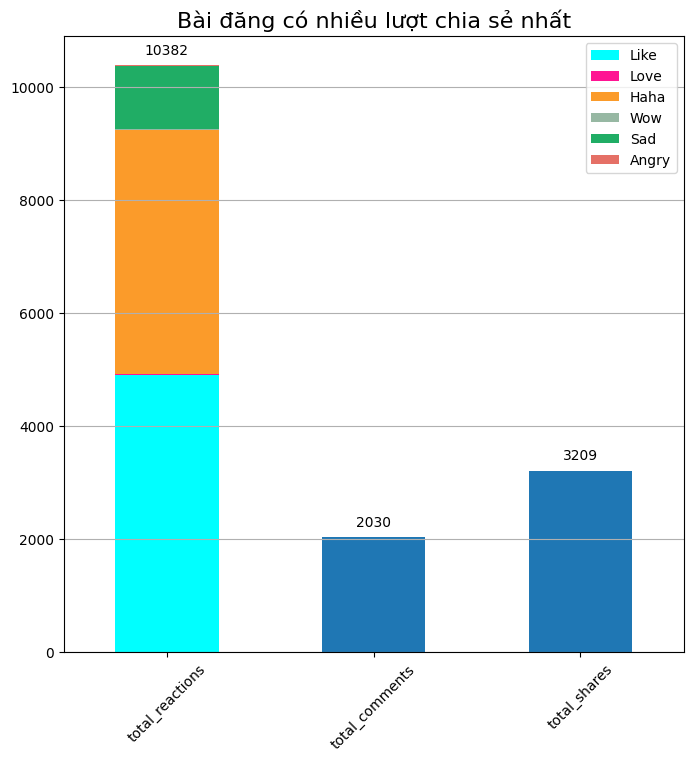

In [209]:
a = post_wtmost_share[['like', 'love', 'haha', 'wow', 'sad', 'angry', 'total_reactions', 'total_shares', 'total_comments']]
plt.figure(figsize=(8, 8))
a[['total_reactions', 'total_comments', 'total_shares']].plot(kind='bar', label='', rot=45)

plt.bar(x=0, height=a['like'], width=0.5, color='cyan', label="Like")
plt.bar(x=0, height=a['love'], width=0.5, color='deeppink', bottom=a['like'], label='Love')
plt.bar(x=0, height=a['haha'], width=0.5, color='#fb9b2a', bottom=(a['like'] + a['love']), label='Haha')
plt.bar(x=0, height=a['wow'], width=0.5, color='#97b8a3', bottom=(a['like'] + a['love'] + a['haha']), label='Wow')
plt.bar(x=0, height=a['sad'], width=0.5, color='#20ad65', bottom=(a['like'] + a['love'] + a['haha'] + a['wow']), label='Sad')
plt.bar(x=0, height=a['angry'], width=0.5, color='#e57066', bottom=(a['like'] + a['love'] + a['haha'] + a['wow'] + a['sad']), label='Angry')

plt.annotate(str(a['total_reactions']), (0, a['total_reactions']+200), ha='center')
plt.annotate(str(a['total_comments']), (1, a['total_comments']+200), ha='center')
plt.annotate(str(a['total_shares']), (2, a['total_shares']+200), ha='center')


plt.legend()
plt.title("Bài đăng có nhiều lượt chia sẻ nhất", fontdict={'size': 16})
plt.grid(axis='y')

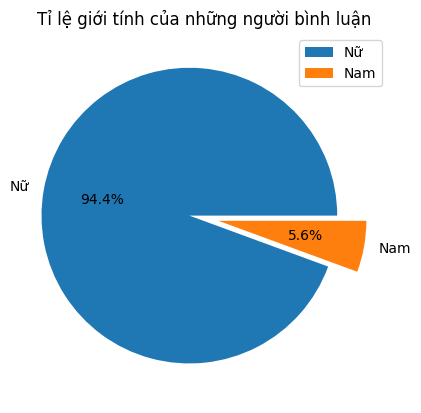

In [192]:
plt.pie(df_comments[df_comments['id_post'] == post_wtmost_share['id_post']]['gender'].value_counts(), autopct = '%1.1f%%', explode=(0.1, 0.1), labels=["Nữ", "Nam"])
plt.title("Tỉ lệ giới tính của những người bình luận")
plt.legend()

Text(0.5, 1.0, 'Tỉ lệ chia sẻ trên từng loại bài đăng')

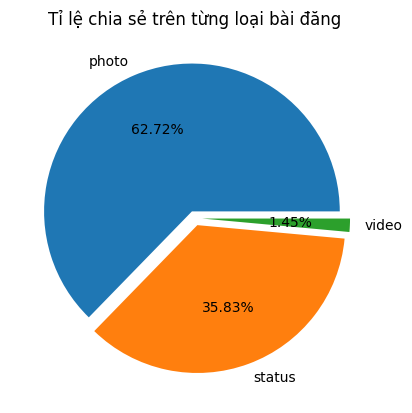

In [40]:
df_clean.groupby('type').sum('total_shares')['total_shares'].plot(kind='pie', autopct="%1.2f%%", explode=[0.05, 0.05, 0.05])
plt.xlabel("")
plt.ylabel("")
plt.title("Tỉ lệ chia sẻ trên từng loại bài đăng")

#### Tách dữ liệu giờ/ngày/tháng/năm

In [24]:
from datetime import datetime, timedelta

def extract_time(date_time, _type):
	c = datetime.strptime(date_time, "%Y-%m-%dT%H:%M:%S%z")
	c += timedelta(hours=7)
	if _type == 'hour':
		return c.hour
	elif _type == 'month': 
		return c.month
	elif _type == 'year':
		return c.year
	elif _type == 'day':
		return c.day

def get_name_of_day(date_time):
	c = datetime.strptime(date_time, "%Y-%m-%dT%H:%M:%S%z")
	c += timedelta(hours=7)
	return c.strftime("%A")

In [41]:
df_clean['hour'] = [extract_time(x, 'hour') for x in df_clean['created_time']]
df_clean['day_name'] = [get_name_of_day(x) for x in df_clean['created_time']]
df_clean['day'] = [extract_time(x, 'day') for x in df_clean['created_time']]
df_clean['month'] = [extract_time(x, 'month') for x in df_clean['created_time']]
df_clean['year'] = [extract_time(x, 'year') for x in df_clean['created_time']]

#### So sánh các post đăng trong khung giờ khác nhau

In [198]:
df_post_by_hour = df_clean.groupby('hour').sum('total_reactions')

In [199]:
df_count_post_by_hour = df_clean.groupby('hour')['id'].count()

In [200]:
df_post_by_hour.index

Index([0, 2, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype='int64', name='hour')

Text(0, 0.5, 'Số lượng bài')

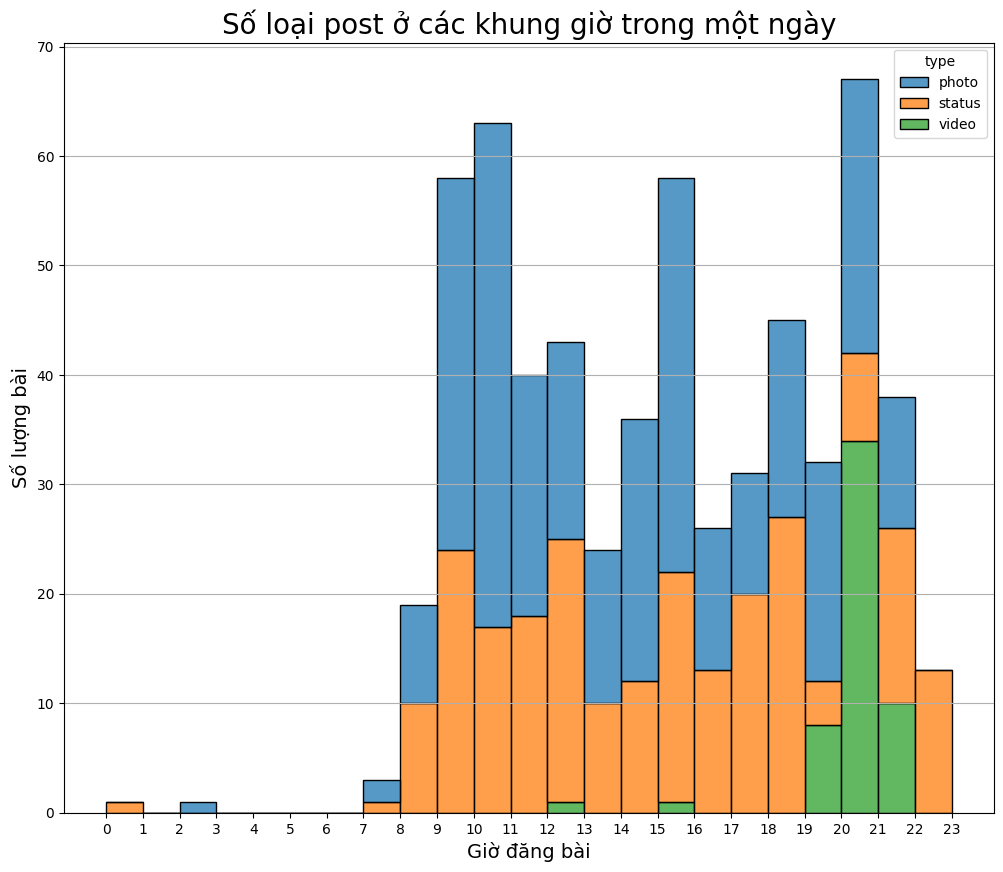

In [210]:
plt.figure(figsize=(12, 10))
sns.histplot(data=df_clean, x='hour', hue='type', multiple='stack', bins=23)
plt.xticks(list(range(24)))
plt.title("Số loại post ở các khung giờ trong một ngày", fontdict={'size': 20})
plt.grid(axis='y', linestyle='-')
plt.xlabel("Giờ đăng bài", fontdict={'size': 14})
plt.ylabel("Số lượng bài", fontdict={'size': 14})

- Khoảng 9-10h và 19-21h có số lượng post khá nhiều.
- Số loại post phân bổ khá đồng đều giữa status và photo trong mọi khung giờ.
- Khoảng thời gian buổi tối 19-21h có khá nhiều post bằng video.
- Khoảng thời gian 23h-6h có số lượng bài đăng khá ít.

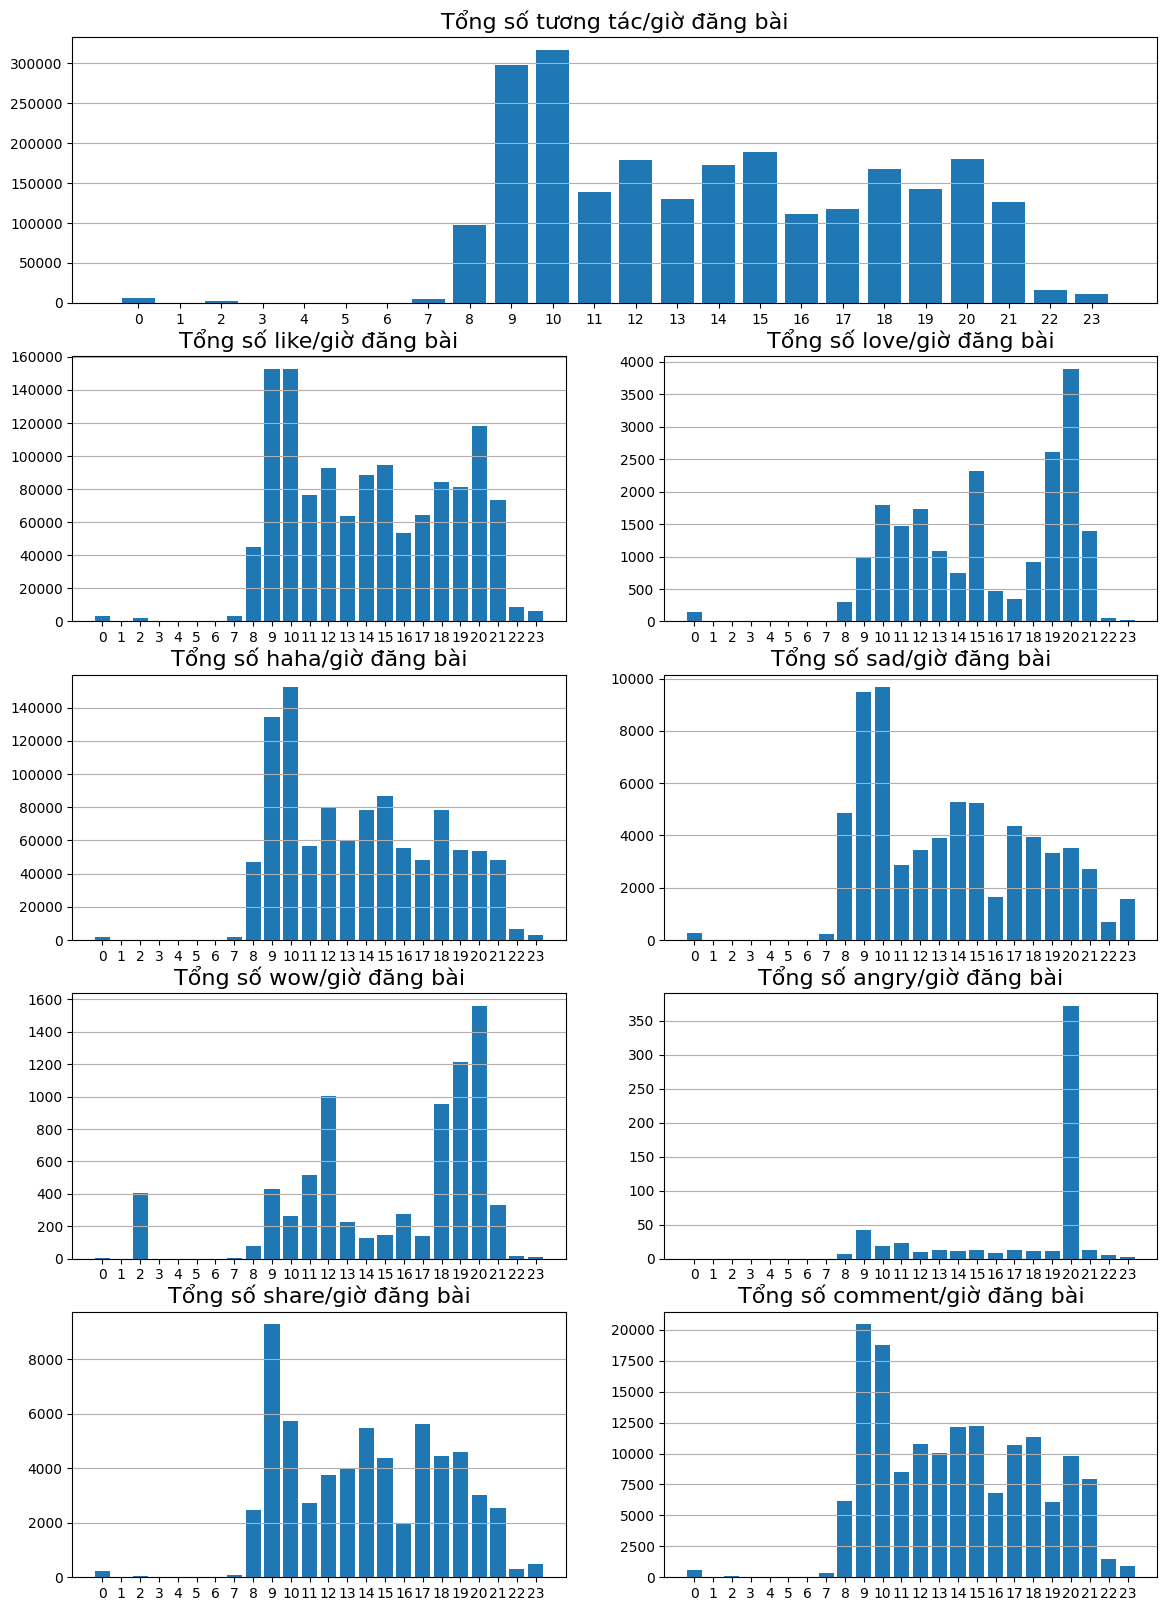

In [208]:
plt.figure(figsize=(14, 20))
ax1 = plt.subplot2grid((5, 2), (0, 0), colspan=3)
ax2 = plt.subplot2grid((5, 2), (1, 0))
ax3 = plt.subplot2grid((5, 2), (1, 1))
ax4 = plt.subplot2grid((5, 2), (2, 0))
ax5 = plt.subplot2grid((5, 2), (2, 1))
ax6 = plt.subplot2grid((5, 2), (3, 0))
ax7 = plt.subplot2grid((5, 2), (3, 1))
ax8 = plt.subplot2grid((5, 2), (4, 0))
ax9 = plt.subplot2grid((5, 2), (4, 1))

ax1.bar(df_post_by_hour.index, df_post_by_hour['total_reactions'])
ax1.set_title("Tổng số tương tác/giờ đăng bài", fontdict={'size': 16})
ax1.set_xticks(list(range(24)))
ax1.grid(axis='y')

ax2.bar(df_post_by_hour.index, df_post_by_hour['like'])
ax2.set_title("Tổng số like/giờ đăng bài", fontdict={'size': 16})
ax2.set_xticks(list(range(24)))
ax2.grid(axis='y')



ax3.bar(df_post_by_hour.index, df_post_by_hour['love'])
ax3.set_title("Tổng số love/giờ đăng bài", fontdict={'size': 16})
ax3.set_xticks(list(range(24)))
ax3.grid(axis='y')


ax4.bar(df_post_by_hour.index, df_post_by_hour['haha'])
ax4.set_title("Tổng số haha/giờ đăng bài", fontdict={'size': 16})
ax4.set_xticks(list(range(24)))
ax4.grid(axis='y')


ax5.bar(df_post_by_hour.index, df_post_by_hour['sad'])
ax5.set_title("Tổng số sad/giờ đăng bài", fontdict={'size': 16})
ax5.set_xticks(list(range(24)))
ax5.grid(axis='y')


ax6.bar(df_post_by_hour.index, df_post_by_hour['wow'])
ax6.set_title("Tổng số wow/giờ đăng bài", fontdict={'size': 16})
ax6.set_xticks(list(range(24)))
ax6.grid(axis='y')


ax7.bar(df_post_by_hour.index, df_post_by_hour['angry'])
ax7.set_title("Tổng số angry/giờ đăng bài", fontdict={'size': 16})
ax7.set_xticks(list(range(24)))
ax7.grid(axis='y')


ax8.bar(df_post_by_hour.index, df_post_by_hour['total_shares'])
ax8.set_title("Tổng số share/giờ đăng bài", fontdict={'size': 16})
ax8.set_xticks(list(range(24)))
ax8.grid(axis='y')


ax9.bar(df_post_by_hour.index, df_post_by_hour['total_comments'])
ax9.set_title("Tổng số comment/giờ đăng bài", fontdict={'size': 16})
ax9.set_xticks(list(range(24)))
ax9.grid(axis='y')


- Có thễ nhận thấy các bài đăng trong khoảng thời gian từ 8h tới 21h trong ngày có lượng tương tác cao nhất. Cao nhất là buổi sáng 9-10h, còn những khoảng thời gian còn lại được phân bố khá đều.
- Cảm xúc like/sad/haha lệch phải có lượng tương tác khá lớn ở các post đăng lúc 9-10h.
- Trái lại thì cảm xúc love/wow/angry lệch trái và tập trung chủ yếu ở các bài đăng vào lúc 20h.
- Số lượng share và comment trông khá giống với lượng like.

Như vậy số lượng tương tác tập trung chủ yếu vào các post đăng ở khung giờ 8-10h sáng và 19-21h tối. Sau một vài giờ đồng hồ đăng bài thì đó chính là 2 khoảng thời gian nghỉ ngơi buổi trưa hoặc đang trong thời gian nghỉ ngơi buổi tối.

#### So sánh các post đăng trong các ngày khác nhau

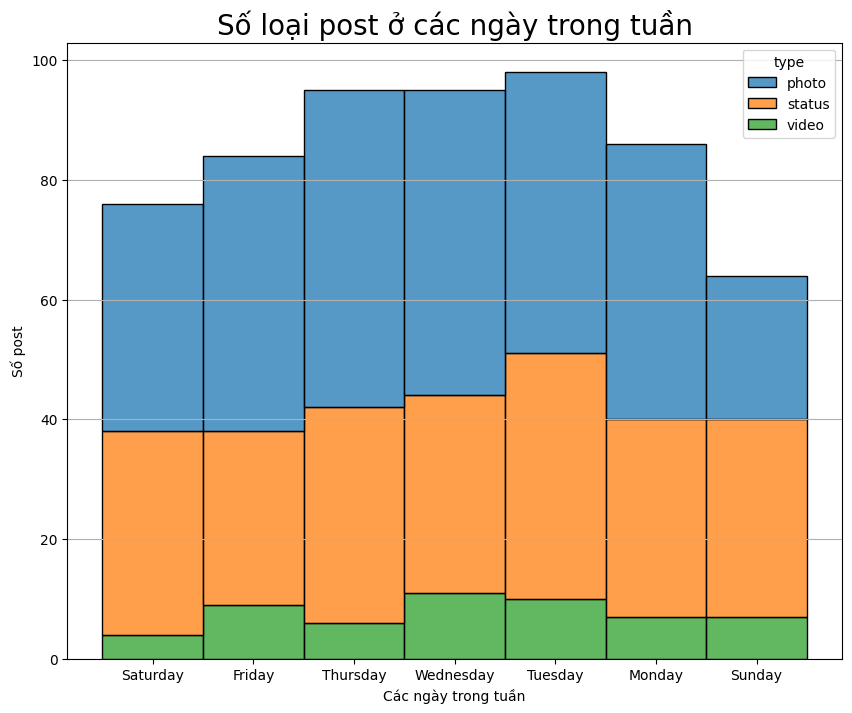

In [211]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df_clean, x='day_name', hue='type', multiple='stack')
plt.xlabel("Các ngày trong tuần")
plt.ylabel("Số post")
plt.title("Số loại post ở các ngày trong tuần", fontdict={'size': 20})
plt.grid(axis='y')

- Tỉ lệ các bài được đăng vào các ngày trong tuần khá đồng đều cả về số lượng và số loại post.
- Số post bằng hình ảnh thường chiếm 1 nửa tổng số bài đăng trong ngày đó, só post bằng video chiếm 1 phần rất nhỏ trong ngày.

In [213]:
df_post_by_day = df_clean.groupby('day_name')[['like', 'love', 'haha', 'wow', 'sad', 'angry', 'total_reactions', 'total_shares', 'total_comments']].sum('total_reactions')
df_post_by_day

like  love    haha   wow    sad  angry  total_reactions  \
day_name                                                               
Friday     171452  2574  155207  1718   9488     27           340466   
Monday     199168  2725  175340   681   9329     32           387275   
Saturday   162036  1773  122950   557   6912     54           294282   
Sunday     101510   996   86392   474   6412     24           195808   
Thursday   221398  3761  158550  1247  10080     23           395059   
Tuesday    213409  3067  177766  1156  13081    389           408868   
Wednesday  195761  5383  170728  1879  11750     23           385524   

           total_shares  total_comments  
day_name                                 
Friday            10617           21607  
Monday             9875           22244  
Saturday           5536           19105  
Sunday             3363           10528  
Thursday          10718           26443  
Tuesday           11719           26337  
Wednesday          9375           28867

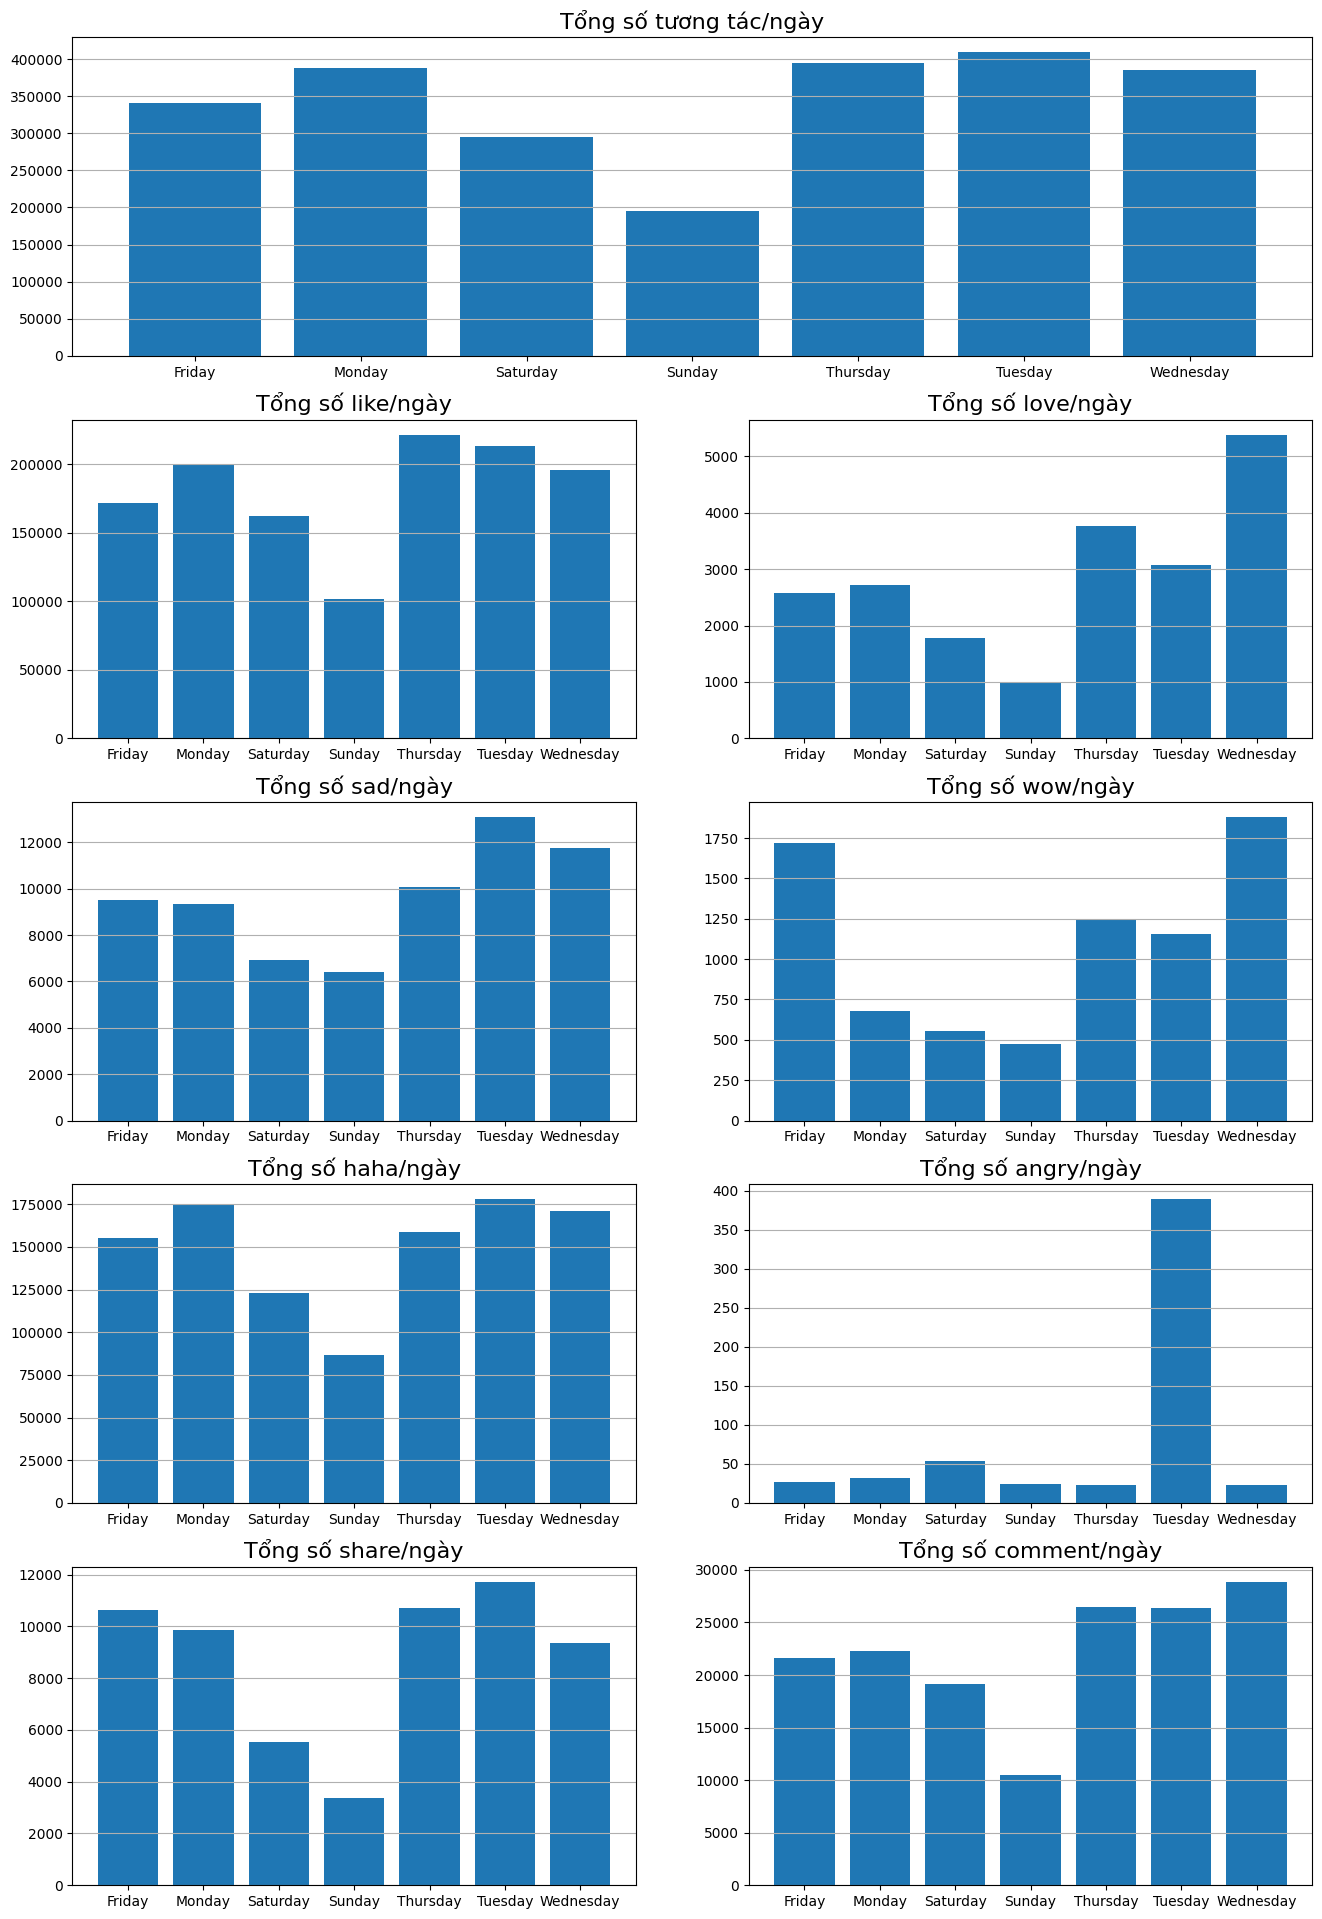

In [214]:
plt.figure(figsize=(16, 24))
ax1 = plt.subplot2grid((5, 2), (0, 0), colspan=3)
ax2 = plt.subplot2grid((5, 2), (1, 0))
ax3 = plt.subplot2grid((5, 2), (1, 1))
ax5 = plt.subplot2grid((5, 2), (2, 0))
ax6 = plt.subplot2grid((5, 2), (2, 1))
ax4 = plt.subplot2grid((5, 2), (3, 0))
ax7 = plt.subplot2grid((5, 2), (3, 1))
ax8 = plt.subplot2grid((5, 2), (4, 0))
ax9 = plt.subplot2grid((5, 2), (4, 1))

ax1.bar(df_post_by_day.index, df_post_by_day['total_reactions'])
ax1.set_title("Tổng số tương tác/ngày", fontdict={'size': 16})

ax2.bar(df_post_by_day.index, df_post_by_day['like'])
ax2.set_title("Tổng số like/ngày", fontdict={'size': 16})

ax3.bar(df_post_by_day.index, df_post_by_day['love'])
ax3.set_title("Tổng số love/ngày", fontdict={'size': 16})

ax4.bar(df_post_by_day.index, df_post_by_day['haha'])
ax4.set_title("Tổng số haha/ngày", fontdict={'size': 16})

ax5.bar(df_post_by_day.index, df_post_by_day['sad'])
ax5.set_title("Tổng số sad/ngày", fontdict={'size': 16})

ax6.bar(df_post_by_day.index, df_post_by_day['wow'])
ax6.set_title("Tổng số wow/ngày", fontdict={'size': 16})

ax7.bar(df_post_by_day.index, df_post_by_day['angry'])
ax7.set_title("Tổng số angry/ngày", fontdict={'size': 16})

ax8.bar(df_post_by_day.index, df_post_by_day['total_shares'])
ax8.set_title("Tổng số share/ngày", fontdict={'size': 16})

ax9.bar(df_post_by_day.index, df_post_by_day['total_comments'])
ax9.set_title("Tổng số comment/ngày", fontdict={'size': 16})

ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')
ax4.grid(axis='y')
ax5.grid(axis='y')
ax6.grid(axis='y')
ax7.grid(axis='y')
ax8.grid(axis='y')
ax9.grid(axis='y')


- Tổng quan thì sô lượt tương tác của các post ở các ngày trong tuần là khá đồng đều nhau, các ngày trong tuần thì nhỉnh hơn so với 2 ngày cuối tuần
- Post đăng vào ngày thứ 3 có sự tăng vọt về cảm xúc angry.
- Phân bổ của lượng comment và lượng share ở các bài đăng ở các ngày khá tương đương với dữ liệu like trong ngày.

Có thể thấy các ngày giữa tuần có lượng tương tác lơn hơn so với 2 ngày cuối tuần. Lý do có thể là 2 ngày cuối tuần các bạn trẻ có nhiều thời gian rảnh để tham gia các hoạt động bên ngoài nên hoạt động trên mạng xã hội ít hơn những ngày bình thường.

#### So sánh lượng tương tác giữa các bài đăng ở các ngày trong tháng 10

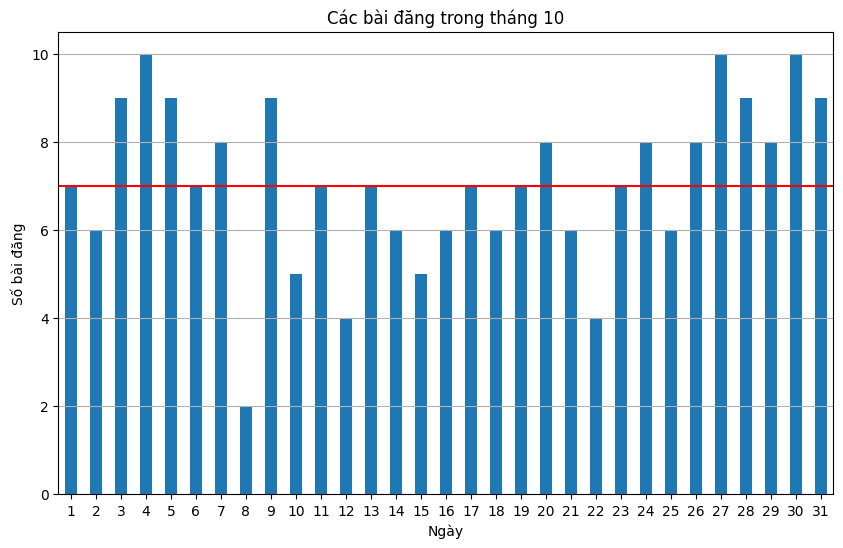

In [237]:
plt.figure(figsize=(10, 6))
count_post_m10 = df_clean[df_clean['month'] == 10].groupby('day')['created_time'].count()
count_post_m10.plot(kind='bar', rot=0, xlabel='Ngày', ylabel='Số bài đăng')
plt.axline((0, int(count_post_m10.mean())), (31, int(count_post_m10.mean())), c='red')
plt.title("Các bài đăng trong tháng 10")
plt.grid(axis='y')

In [228]:
df_post_m10 = df_clean[df_clean['month'] == 10].groupby('day').sum('total_reactions')

Text(0.5, 1.0, 'Lượng tương tác của các bài đăng trong tháng 10')

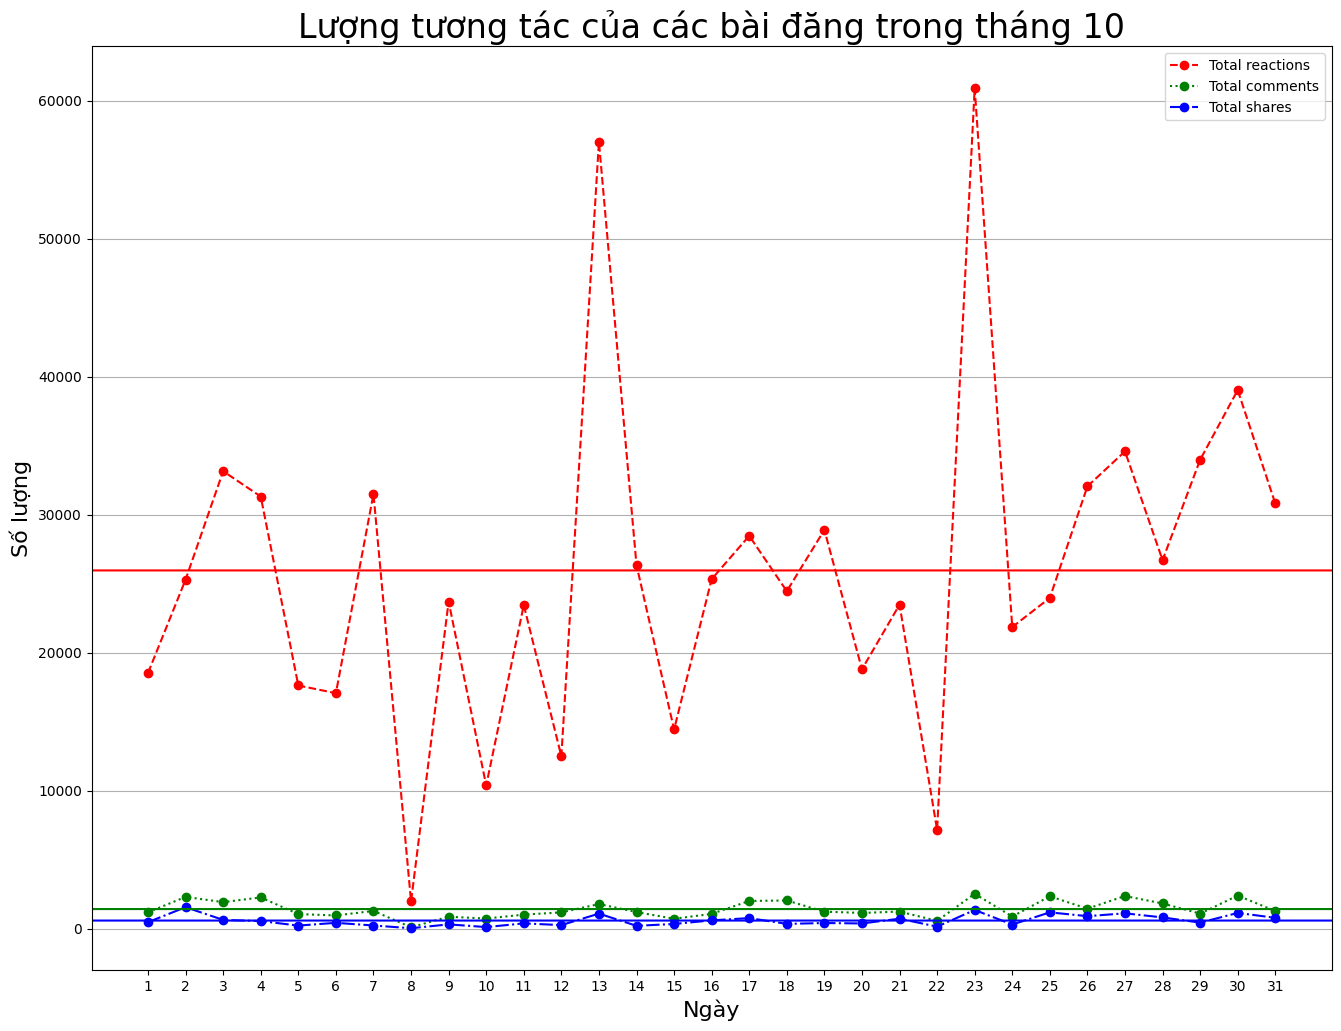

In [229]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.plot(df_post_m10['total_reactions'], linestyle='--', marker='o', color='red', label="Total reactions")
ax.plot(df_post_m10['total_comments'], linestyle=':', marker='o', color='green', label="Total comments")
ax.plot(df_post_m10['total_shares'], linestyle='-.', marker='o', color='blue', label="Total shares")
ax.axline((1, df_post_m10['total_reactions'].mean()), (31, int(df_post_m10['total_reactions'].mean())), color='red')
ax.axline((1, df_post_m10['total_comments'].mean()), (31, int(df_post_m10['total_comments'].mean())), color='green')
ax.axline((1, df_post_m10['total_shares'].mean()), (31, int(df_post_m10['total_shares'].mean())), color='blue')
ax.legend()
ax.grid(axis='y')
plt.xticks(range(1, 32))
plt.xlabel("Ngày", fontdict={'size': 16})
plt.ylabel("Số lượng", fontdict={'size': 16})
plt.title("Lượng tương tác của các bài đăng trong tháng 10", fontdict={'size': 24})

Text(0.5, 1.0, 'Lượng tương tác của các bài đăng trong tháng 10')

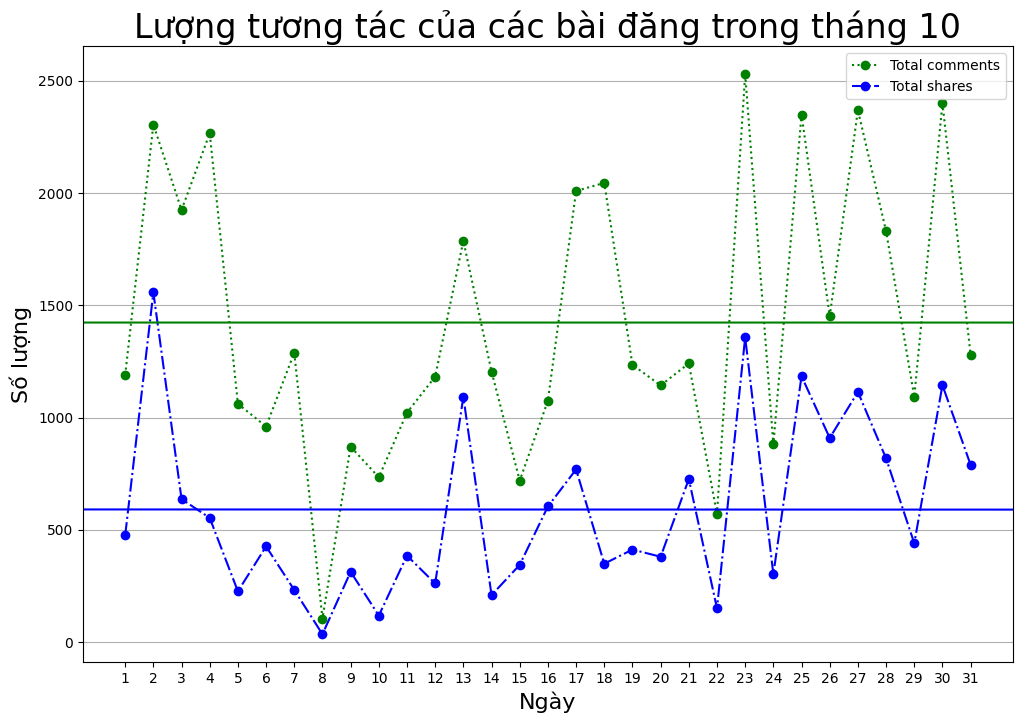

In [231]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df_post_m10['total_comments'], linestyle=':', marker='o', color='green', label="Total comments")
ax.plot(df_post_m10['total_shares'], linestyle='-.', marker='o', color='blue', label="Total shares")
ax.axline((1, df_post_m10['total_comments'].mean()), (31, int(df_post_m10['total_comments'].mean())), color='green')
ax.axline((1, df_post_m10['total_shares'].mean()), (31, int(df_post_m10['total_shares'].mean())), color='blue')
ax.legend()
ax.grid(axis='y')
plt.xticks(range(1, 32))
plt.xlabel("Ngày", fontdict={'size': 16})
plt.ylabel("Số lượng", fontdict={'size': 16})
plt.title("Lượng tương tác của các bài đăng trong tháng 10", fontdict={'size': 24})

- Lượng comment và lượng share khá tương đồng, tuy nhiên lượng reaction có cách biệt khá là rõ ràng.
- Theo biểu đồ trên thì lượng tương tác trung bình của trang trong các ngày trung bình rơi vào khoảng 20k-30k tổng lượt reaction và có xu hướng tăng khi ở những ngày cuối tháng.
- Số lượng comments thì khá đều nhau, khoảng 1k-2k.

#### So sánh lượng tương tác giữa các bài đăng giữa các ngày trong tháng 11 tới hiện tại

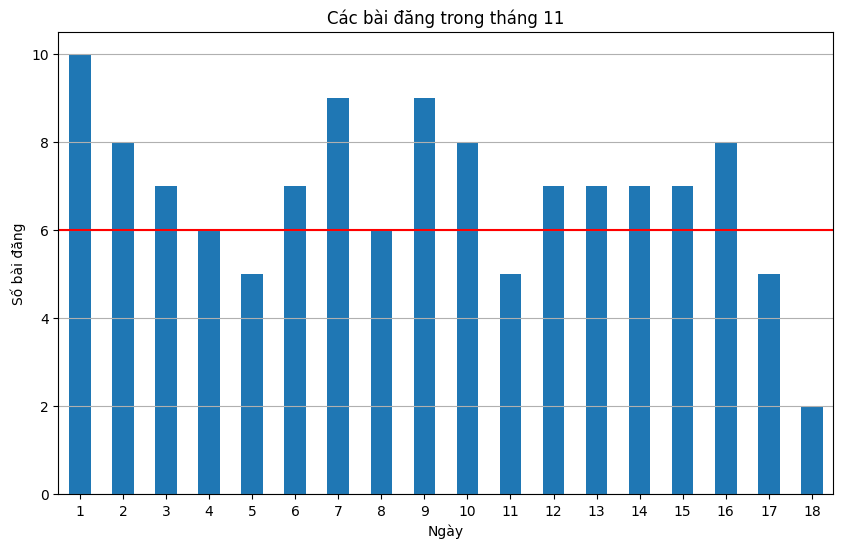

In [239]:
plt.figure(figsize=(10, 6))
count_post_m11 = df_clean[df_clean['month'] == 11].groupby('day')['created_time'].count()
count_post_m11.plot(kind='bar', rot=0, xlabel='Ngày', ylabel='Số bài đăng')
plt.axline((0, int(count_post_m11.mean())), (30, int(count_post_m11.mean())), c='red')
plt.title("Các bài đăng trong tháng 11")
plt.grid(axis='y')

In [243]:
df_post_m11 = df_clean[df_clean['month'] == 11].groupby('day').sum('total_reactions')

In [244]:
df_post_m11

id   like  love   haha  wow   sad  angry  total_reactions  \
day                                                                            
1    1010840317789280  20953   740  15600  469  2252      3            40017   
2     808672254231424  15881   328  13969   28   202      0            30408   
3     707588222452496  31006   816  26227  340  1564      5            59958   
4     606504190673568  15825    70  23085   36   471      5            39492   
5     505420158894640   8353    29   9356   12   697      2            18449   
6     707588222452496  11859    64   9854   19   464      0            22260   
7     909756286010352  17090   389  13543  188  1652      4            32866   
8     606504190673568  10694    29   9800   17   854      3            21397   
9     909756286010352  34060  1320  13716   23  2199      4            51322   
10    808672254231424  20231   380  13093  512  1416      0            35632   
11    505420158894640   7613    28   3929   10  1040      4            12624   
12    707588222452496  11026    33   8612   20   485      6            20182   
13    707588222452496  17174   179  11946   32   283      2            29616   
14    707588222452496  13807   121  13746   15   373      2            28064   
15    707588222452496  16110   115  15193   28   576      2            32024   
16    808672254231424  21459  1002  14290  617  1790      1            39159   
17    505420158894640   5004    14   5286   14   183      1            10502   
18    202168063557856    603     3    638    1    24      0             1269   

     total_shares  total_comments  video_length  hour  month   year  
day                                                                  
1            1568            3138            30   174    110  20230  
2             732            1924            42   108     88  16184  
3            3813            4322             0   112     77  14161  
4             635            2187             0    77     66  12138  
5             543             773             0    71     55  10115  
6             407            1116             0    96     77  14161  
7            1584            1973           131   128     99  18207  
8             358            1625             0    86     66  12138  
9            1449            2621             0   140     99  18207  
10           1023            2119             0   120     88  16184  
11            377             894             0    62     55  10115  
12            296             972             0   114     77  14161  
13            709            1235             0    94     77  14161  
14           2645            1932             0    96     77  14161  
15            693            1828           130    98     77  14161  
16           1235            1733             0   128     88  16184  
17            225            1180             0    81     55  10115  
18             12              66             0    20     22   4046

Text(0.5, 1.0, 'Lượng tương tác của các bài đăng trong tháng 11')

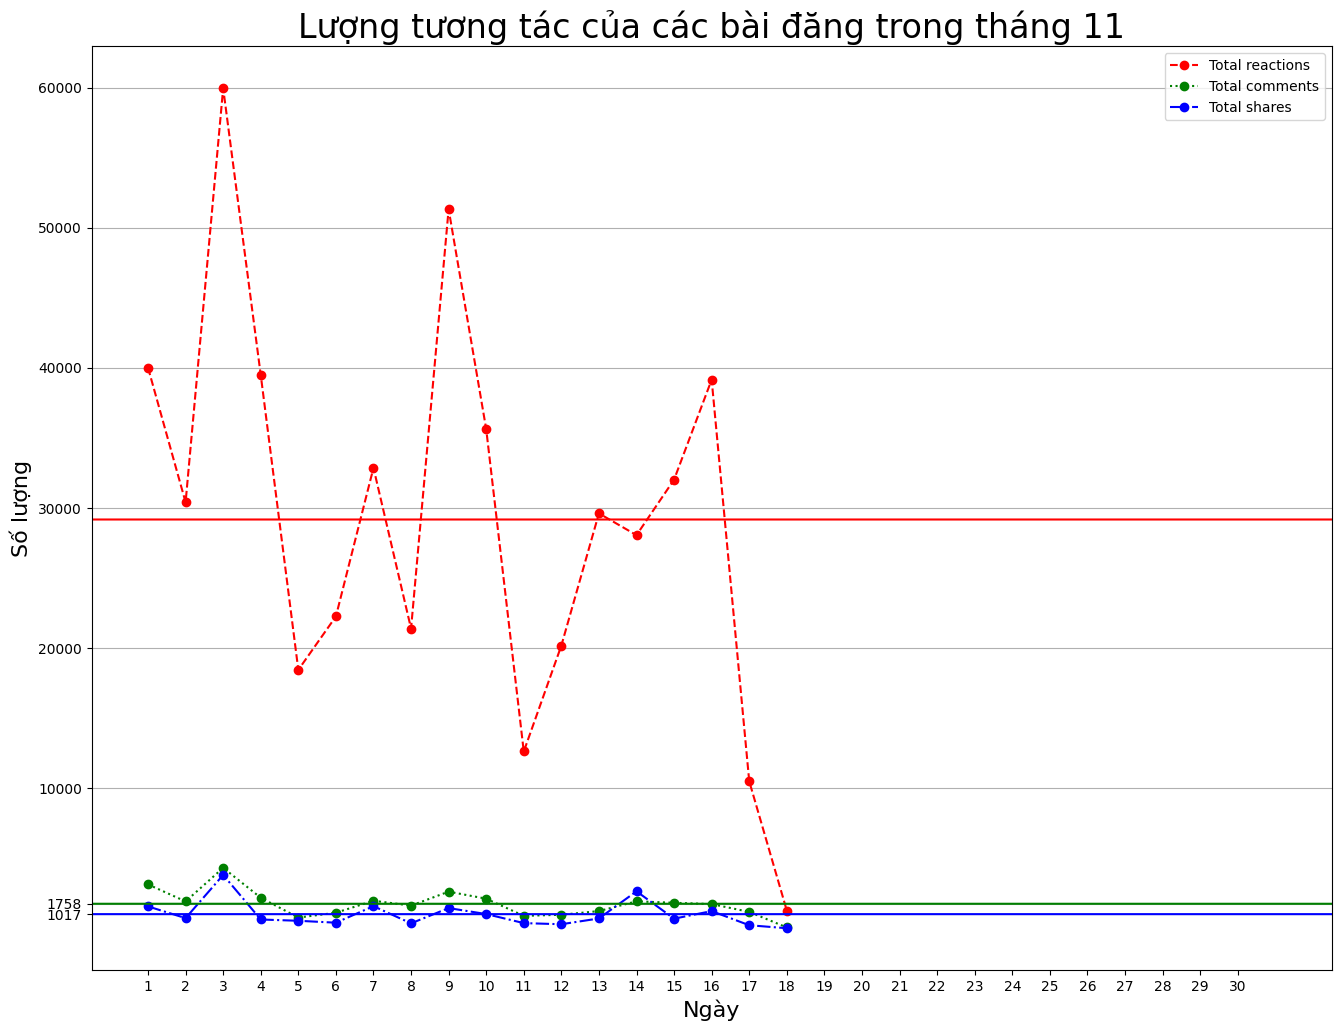

In [245]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.plot(df_post_m11['total_reactions'], linestyle='--', marker='o', color='red', label="Total reactions")
ax.plot(df_post_m11['total_comments'], linestyle=':', marker='o', color='green', label="Total comments")
ax.plot(df_post_m11['total_shares'], linestyle='-.', marker='o', color='blue', label="Total shares")
ax.axline((1, df_post_m11['total_reactions'].mean()), (31, int(df_post_m11['total_reactions'].mean())), color='red')
ax.axline((1, df_post_m11['total_comments'].mean()), (31, int(df_post_m11['total_comments'].mean())), color='green')
ax.axline((1, df_post_m11['total_shares'].mean()), (31, int(df_post_m11['total_shares'].mean())), color='blue')
ax.legend()
ax.grid(axis='y')
plt.xticks(range(1, 31))
plt.yticks((df_post_m11['total_shares'].mean(), df_post_m11['total_comments'].mean(), 10000, 20000, 30000, 40000, 50000, 60000))
plt.xlabel("Ngày", fontdict={'size': 16})
plt.ylabel("Số lượng", fontdict={'size': 16})
plt.title("Lượng tương tác của các bài đăng trong tháng 11", fontdict={'size': 24})

Text(0.5, 1.0, 'Lượng tương tác của các bài đăng trong tháng 11')

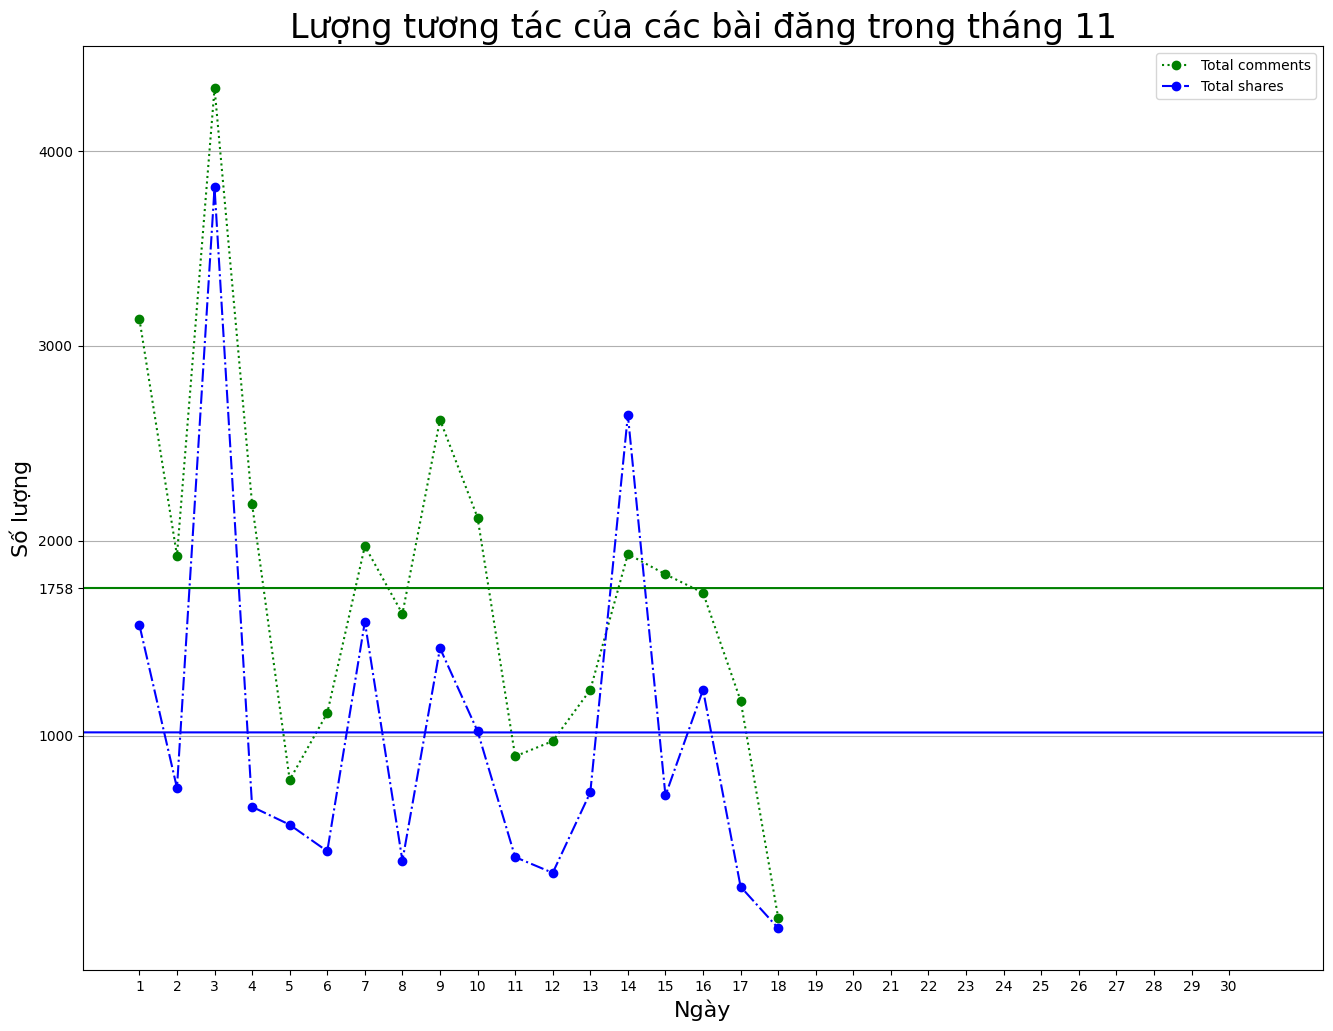

In [251]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.plot(df_post_m11['total_comments'], linestyle=':', marker='o', color='green', label="Total comments")
ax.plot(df_post_m11['total_shares'], linestyle='-.', marker='o', color='blue', label="Total shares")
ax.axline((1, df_post_m11['total_comments'].mean()), (31, int(df_post_m11['total_comments'].mean())), color='green')
ax.axline((1, df_post_m11['total_shares'].mean()), (31, int(df_post_m11['total_shares'].mean())), color='blue')
ax.legend()
ax.grid(axis='y')
plt.xticks(range(1, 31))
plt.yticks((df_post_m11['total_comments'].mean(), 1000, 2000, 3000, 4000))
plt.xlabel("Ngày", fontdict={'size': 16})
plt.ylabel("Số lượng", fontdict={'size': 16})
plt.title("Lượng tương tác của các bài đăng trong tháng 11", fontdict={'size': 24})

- Tương tự tháng 10, lượng share và comment khá là tương đồng nhau, lượng reaction thì cách biệt rất rõ ràng.
- Có vẻ như trong tháng 11 lượng tương tác trung bình của các bài đăng dần được tăng lên (~30k).
- Tuy vậy số lượng comment vẫn ổn định ở khoảng 1k-2k không có nhiều biến động.

Như vậy có thể thấy mọi người thường chỉ thả lại cảm xúc rồi đi qua, tỉ lệ để lại comment và share bài viết là khá thấp

#### Các bài đăng là video

In [253]:
df_video = df_clean[df_clean['type'] == 'video']
df_video.shape

(54, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x20853256550>,
 'caps': [<matplotlib.lines.Line2D at 0x20852f8b610>,
 'boxes': [<matplotlib.lines.Line2D at 0x208532569d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20852f3b950>],
 'fliers': [<matplotlib.lines.Line2D at 0x2085304f690>],
 'means': []}

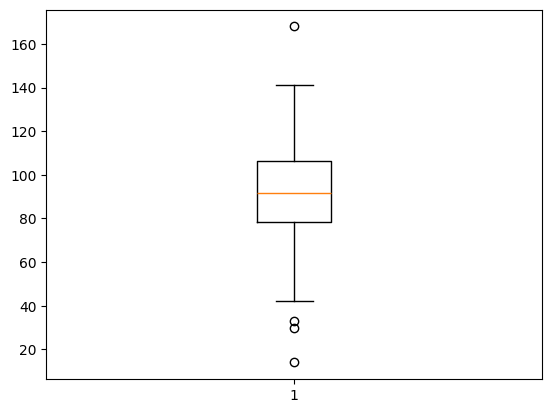

In [272]:
plt.boxplot(df_video['video_length'])

Trong 600 bài đăng có 54 bài đăng là video (chiếm khoảng 10%) và trung bình mỗi video dài khoảng 1p30s phù hợp với xu thế hiện tại.

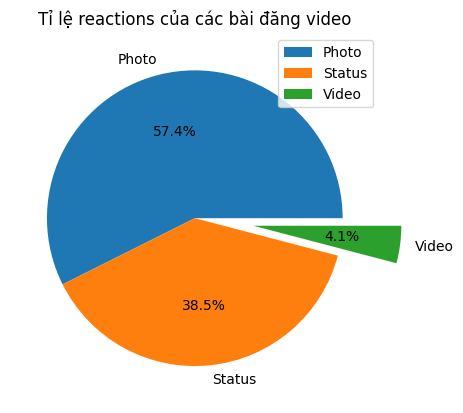

In [6]:
plt.pie(df_clean.groupby('type').sum('total_reactions')['total_reactions'], autopct='%1.1f%%', explode=(0, 0, 0.4), labels=["Photo", "Status", "Video"])
plt.title("Tỉ lệ reactions của các bài đăng video")
plt.legend()

Các bài đăng video không có hiệu suất tốt vì chiếm 10% số lượng bài viết nhưng lượng tương tác của video mới chỉ chiếm 4.1% tổng lượng tương tác.

#### So sánh tương quan độ dài bài viết

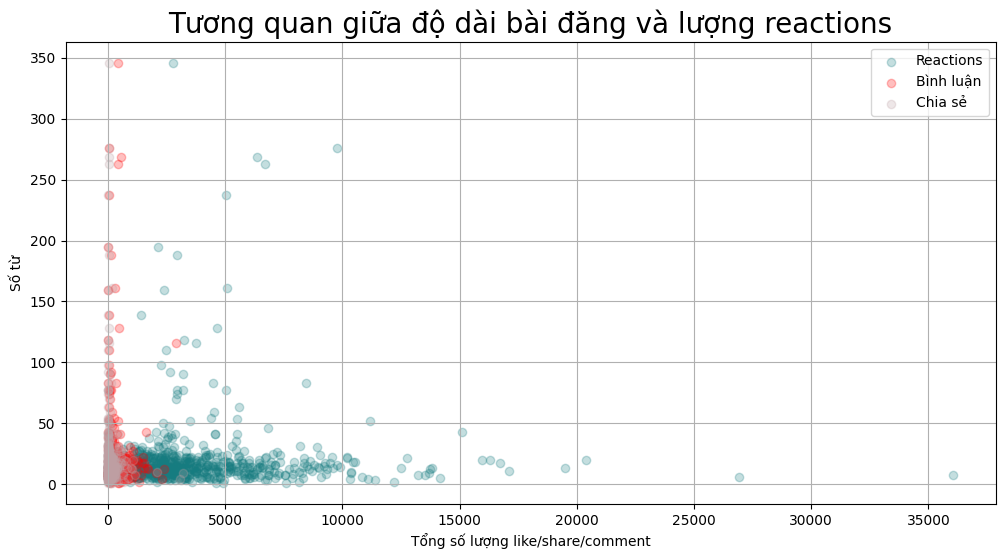

In [7]:
plt.figure(figsize=(12, 6))

plt.xlabel("Tổng số lượng like/share/comment")
plt.ylabel("Số từ")
plt.title("Tương quan giữa độ dài bài đăng và lượng reactions", fontdict={'size': 20})
plt.scatter(x=df_clean['total_reactions'], y=df_clean['message'].map(lambda x: len(x.split())), alpha=0.25, c='#167c80', label='Reactions')
plt.scatter(x=df_clean['total_comments'], y=df_clean['message'].map(lambda x: len(x.split())), alpha=0.25, c='red', label='Bình luận')
plt.scatter(x=df_clean['total_shares'], y=df_clean['message'].map(lambda x: len(x.split())), alpha=0.25, c='#bea1a5', label='Chia sẻ')
plt.legend()
plt.grid()

Ở những bài viết có khoảng dưới 50 từ có số lượng reactions, bình luận và chia sẻ tập trung khá nhiều.

#### Phân tích dữ liệu bình luận của người dùng

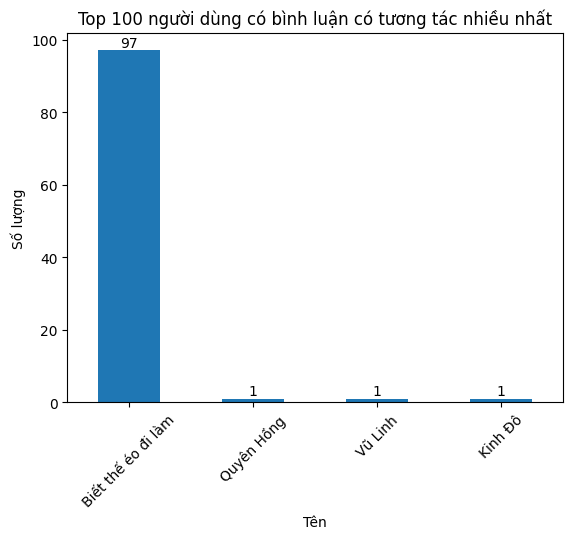

In [42]:
df_top_reaction_cmt = df_comments.sort_values('reactions', ascending=False).head(100)['name'].value_counts()
df_top_reaction_cmt.plot(kind='bar', xlabel='Tên', ylabel='Số lượng', title="Top 100 người dùng có bình luận có tương tác nhiều nhất", rot=45)
for i in range(len(df_top_reaction_cmt)):
	plt.annotate(str(df_top_reaction_cmt.iloc[i]), (i, df_top_reaction_cmt.iloc[i]+1), ha='center')
plt.show()

Trong 100 bình luận có lượng tương tác cao nhất thì có đến tận 97 bình luận tới từ chính chủ trang.

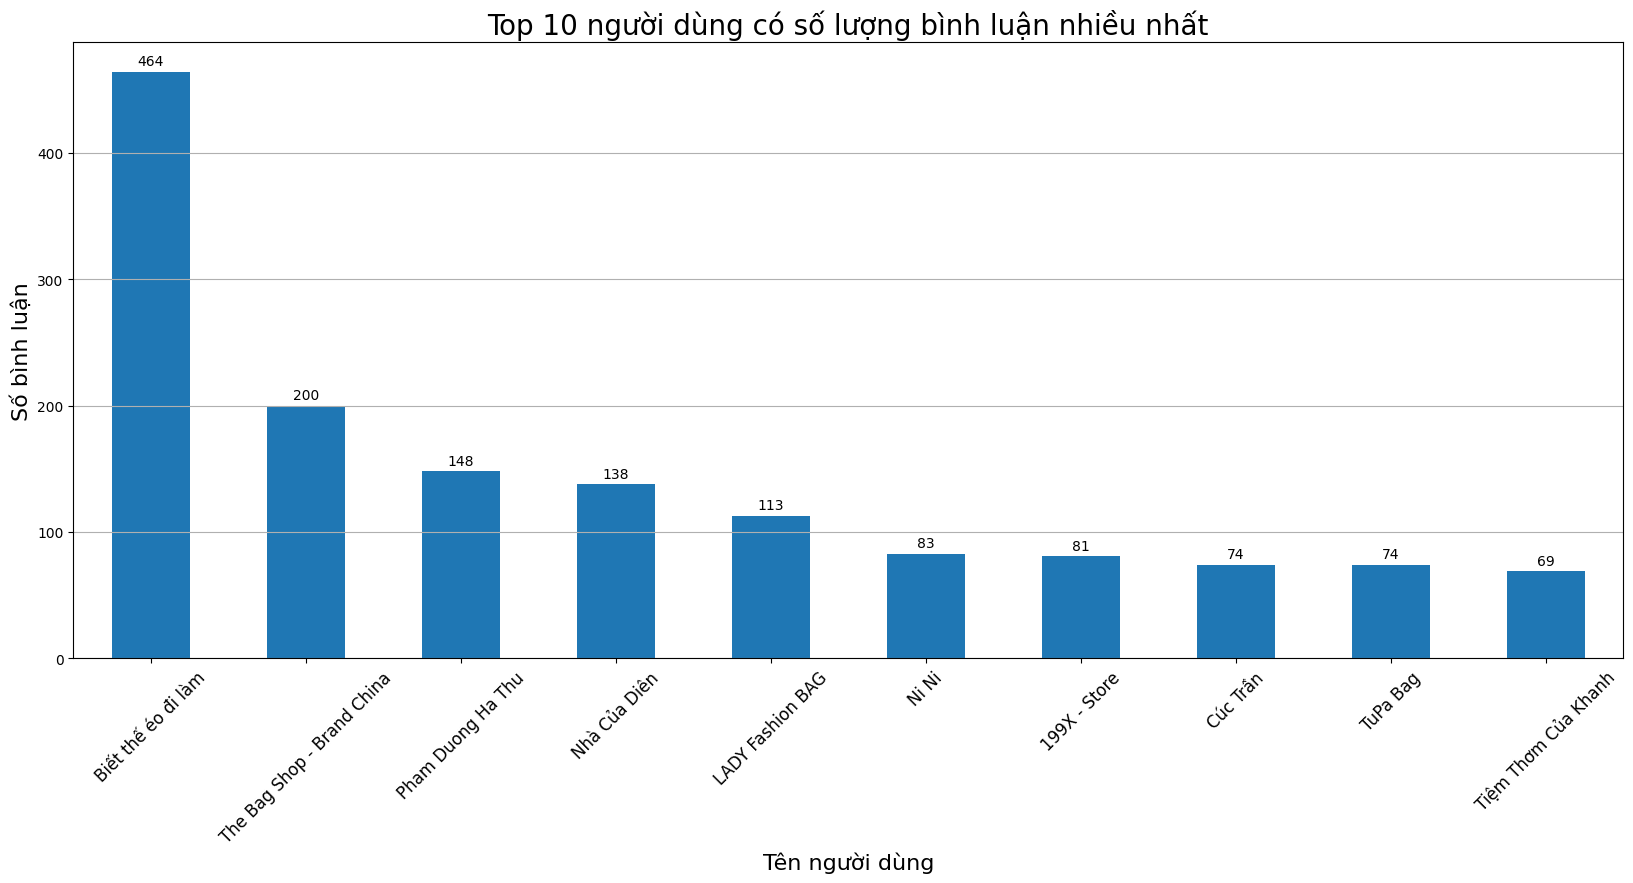

In [12]:
top10_user_comments = df_comments.groupby(['id_user', 'name'])['created_time'].count().sort_values(ascending=False).droplevel(level=0).head(10)
df_test = df_comments.groupby(['id_user', 'name'])['reactions'].sum()
plt.figure(figsize=(20, 8))
top10_user_comments.plot(kind='bar', rot=45)
for i in range(len(top10_user_comments)):
	plt.annotate(
		str(int(top10_user_comments.iloc[i])), 
		(i, top10_user_comments.iloc[i] + 5),
		ha='center'
		)
plt.xlabel("Tên người dùng", fontdict={'size': 16})
plt.ylabel("Số bình luận", fontdict={'size': 16})
plt.xticks(fontsize=12)
plt.title("Top 10 người dùng có số lượng bình luận nhiều nhất", fontdict={'size': 20})
plt.grid(axis='y')

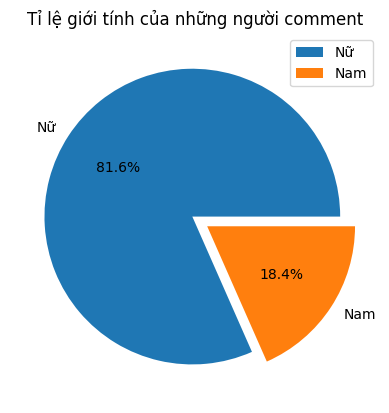

In [7]:
df_comments_unique = df_comments.groupby('id_user').filter(lambda x: len(x) > 1)
plt.pie(df_comments_unique['gender'].value_counts(), autopct = '%1.1f%%', explode=(0.02, 0.1), labels=["Nữ", "Nam"])
plt.title("Tỉ lệ giới tính của những người comment")
plt.legend()

Tỉ lệ nam/nữ có sự chênh lệch khá là lớn, số lượng nữ chiếm khoảng > 80%. Có thể đưa ra kết luận là nữ giới có tần suất sử dụng mạng xã hội nhiều hơn nam giới.

In [8]:
df_comments_from_country = df_comments_unique.groupby('country').count().sort_values('city', ascending=False)
df_comments_from_country.head()

created_time  message     id  reactions  id_post  id_user   name  \
country                                                                        
Việt Nam           47584    46892  47584      47584    47584    47584  47584   
Other              23063    22629  23063      23063    23063    23063  23063   
Trung Quốc           731      721    731        731      731      731    731   
Lesotho              433      432    433        433      433      433    433   
Nhật Bản             365      363    365        365      365      365    365   

            gender   city  
country                    
Việt Nam     47584  47584  
Other        23063  23063  
Trung Quốc     731    731  
Lesotho        433    433  
Nhật Bản       365    365

`country` có giá trị Other là những cột bị khuyết thiếu dữ liệu không thể xử lý. 

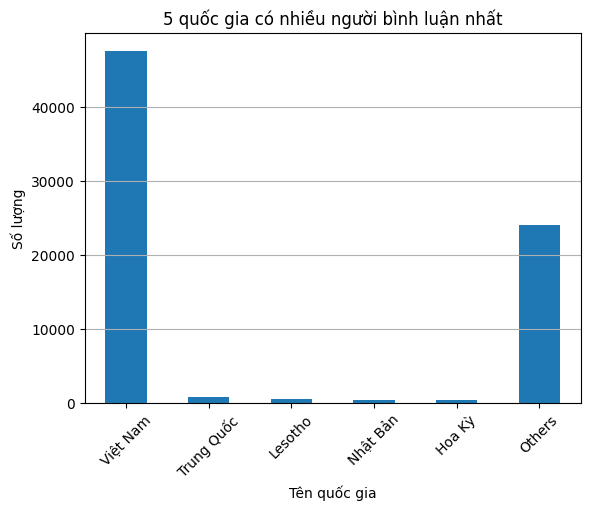

In [9]:
df_cmt_top5_country = df_comments_from_country[df_comments_from_country.index != 'Other']['created_time'].head(5)
df_cmt_top5_country['Others'] = df_comments_from_country.query(f"country not in {list(df_cmt_top5_country.index)}")['created_time'].sum()
df_cmt_top5_country.plot(kind='bar', rot=45, title='5 quốc gia có nhiều người bình luận nhất', xlabel="Tên quốc gia", ylabel="Số lượng")
plt.grid(axis='y')

Phần lớn lượng tương tác đến từ Việt Nam, cột Others chứa tổng số tài khoản tương tác khác nhưng nó bao gồm cả dữ liệu khuyết thiếu và dữ liệu của các quốc gia khác chiếm 1 số rất nhỏ. Bởi vì số lượng tương tác tới từ Trung Quốc là nước đứng thứ 2 vẫn chênh lệch với top 1 khoảng cách rất lớn.

In [10]:
df_chart_city = df_comments_unique[df_comments_unique['country'] == 'Việt Nam'].groupby('city')['gender'].value_counts().unstack()
df_chart_city.fillna(0)
df_chart_city['total'] = df_chart_city['male'] + df_chart_city['female']

In [11]:
lat = []
long = []
for cityName in df_chart_city.index:
	try:
		loc = geolocator.geocode(cityName)
		lat.append(loc.latitude)
		long.append(loc.longitude)
	except:
		lat.append(0)
		long.append(0)
df_chart_city['latitude'] = pd.Series(lat)
df_chart_city['longitude'] = pd.Series(long)

df_chart_city['latitude'] = pd.Series(lat, index=df_chart_city.index)
df_chart_city['longitude'] = pd.Series(long, index=df_chart_city.index)
df_chart_city = df_chart_city[df_chart_city['longitude'] != 0]

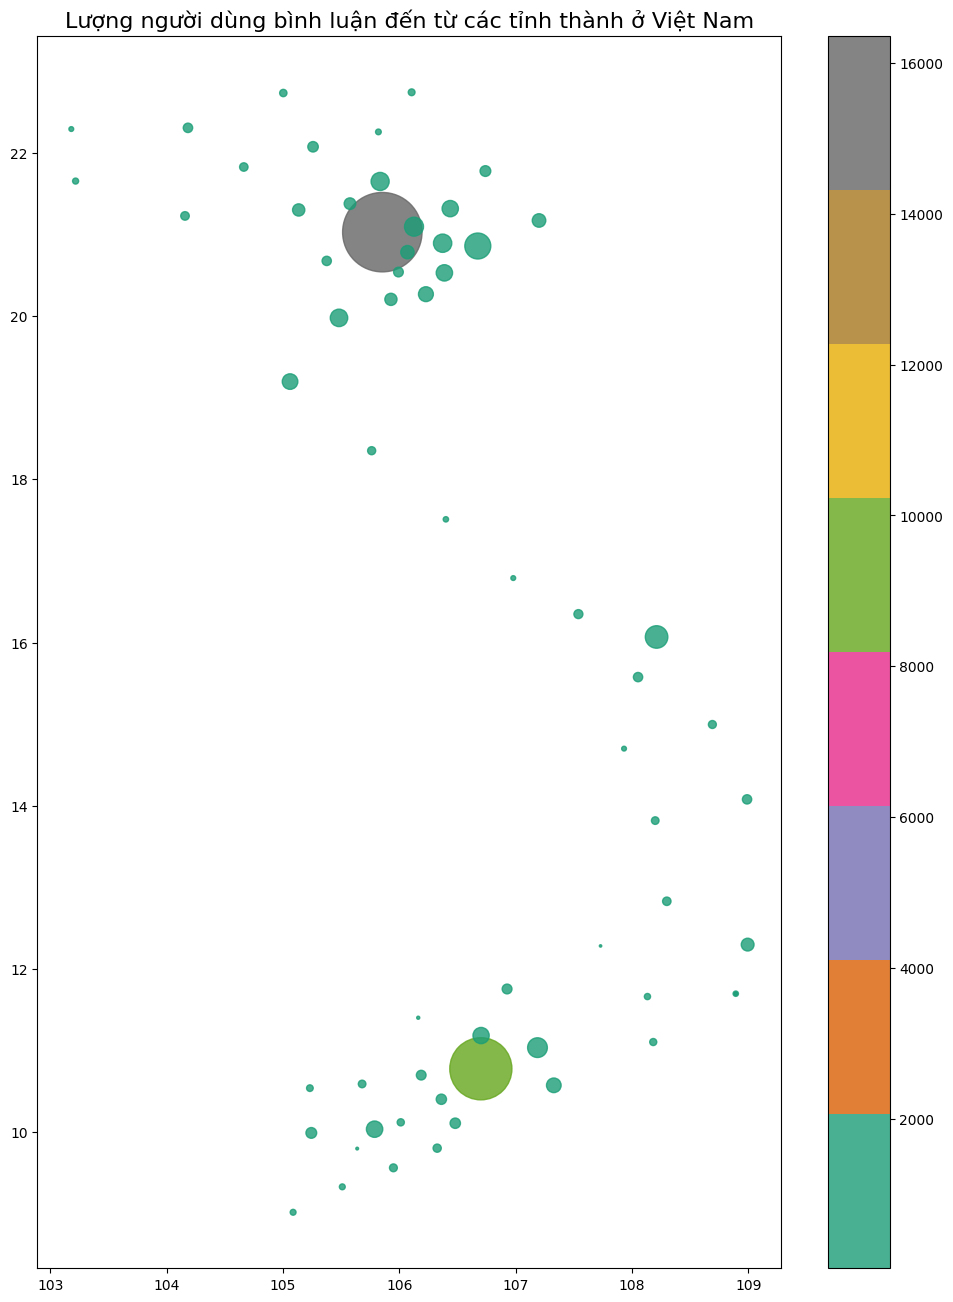

In [13]:
plt.figure(figsize=(12, 16))
plt.scatter(x=df_chart_city['longitude'], y=df_chart_city['latitude'], s=df_chart_city['total'] // 5, alpha=0.8, cmap='Dark2', c=(df_chart_city['total'] / 1))
plt.colorbar()
plt.title("Lượng người dùng bình luận đến từ các tỉnh thành ở Việt Nam", fontdict={'size': 16})

plt.show()

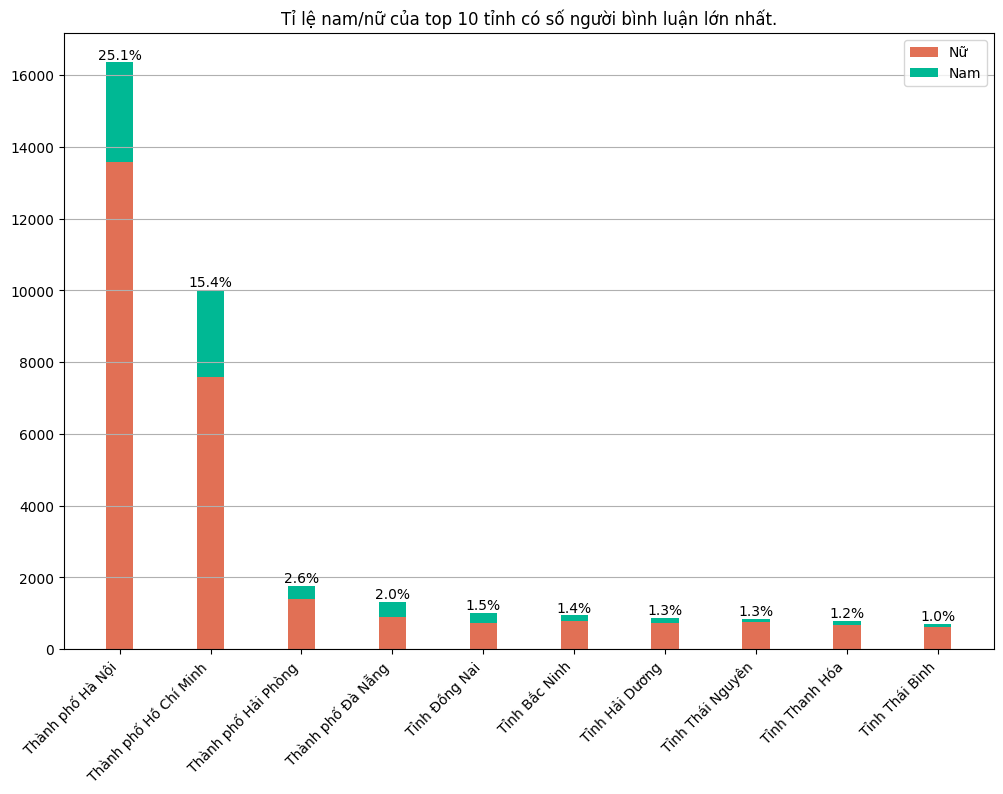

In [21]:
df_chart_top10city = df_chart_city.sort_values('total', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(list(df_chart_top10city.index), list(df_chart_top10city['female']), width=0.3, color="#e17055", label="Nữ")
ax.bar(list(df_chart_top10city.index), list(df_chart_top10city['male']), width=0.3, bottom=list(df_chart_top10city['female']), color="#00b894", label="Nam")
for i in range(len(df_chart_top10city)):
	plt.annotate(
		str(int(int(df_chart_top10city.iloc[i]['female'] + df_chart_top10city.iloc[i]['male']) / len(df_chart_city))/10) + '%', 
		(i, df_chart_top10city.iloc[i]['female'] + df_chart_top10city.iloc[i]['male'] + 100),
		ha='center'
		)
plt.xticks(rotation=45, ha='right')
plt.title("Tỉ lệ nam/nữ của top 10 tỉnh có số người bình luận lớn nhất.")
plt.legend()
plt.grid(axis='y')

- Đa phần mọi người đều đến từ các thành phố lớn và tỉ lệ nam nữ vẫn chênh lệch khá lớn.
- Tp Hà Nội và TpHCM có lượt tương tác lớn hơn hẳn so với các tỉnh thành còn lại do một số lượng lớn giới trẻ hiện đang sinh sống học tập và làm việc tại 2 thành phố này. 

In [25]:
df_comments['hour'] = [extract_time(x, 'hour') for x in df_comments['created_time']]
df_comments['day_name'] = [get_name_of_day(x) for x in df_comments['created_time']]
df_comments['day'] = [extract_time(x, 'day') for x in df_comments['created_time']]

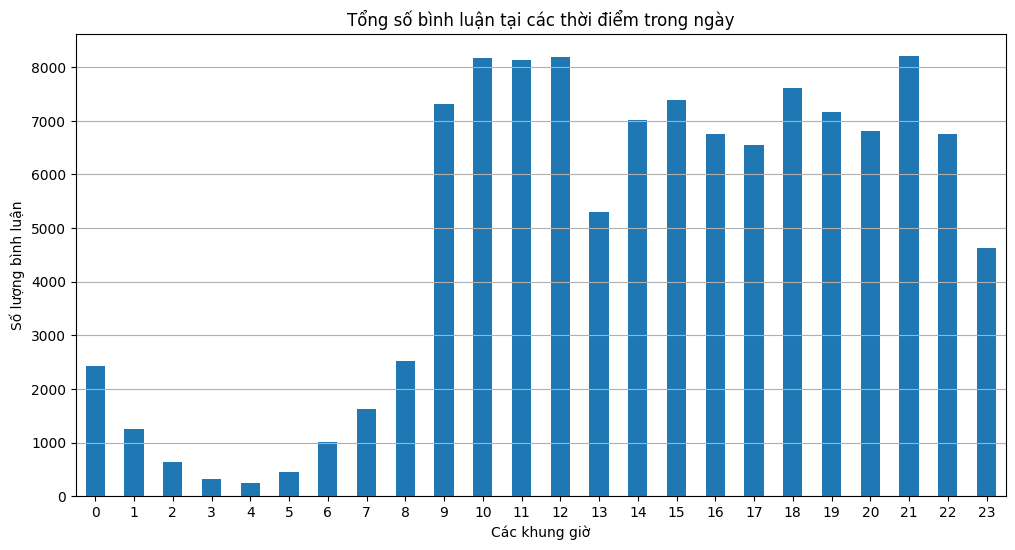

In [29]:
plt.figure(figsize=(12, 6))
df_comments.groupby('hour')['created_time'].count().plot(kind='bar', rot=0, title="Tổng số bình luận tại các thời điểm trong ngày")
plt.ylabel("Số lượng bình luận")
plt.xlabel("Các khung giờ")
plt.grid(axis='y')

Khoảng thời gian từ 9h-22h là khoảng thời gian có số bình luận khá cao vì đây chính là khoảng thời gian thức của mọi người. Từ khoảng 23h trở đi là lượng bình luận giảm dần cho tới 4h sáng. Từ 5h sáng có thể có những người đã ngủ dậy và lượng bình luận có xu hướng tắng.

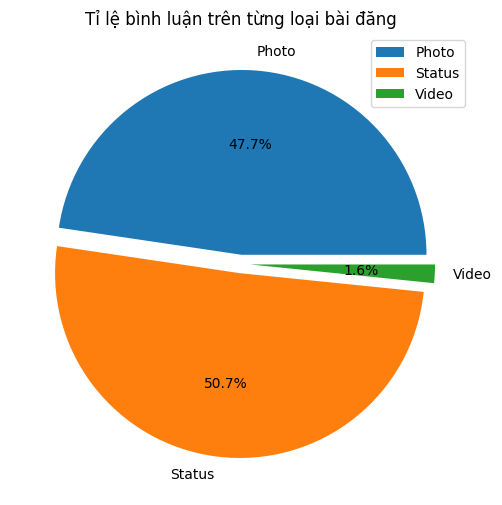

In [30]:
df_comment_of_type  = df_clean.merge(how='inner', on='id_post', right=df_comments).groupby('type')['created_time_y'].count()
plt.figure(figsize=(6, 6))
plt.pie(df_comment_of_type, autopct = '%1.1f%%', explode = (0.05, 0.05, 0.05), labels=['Photo', 'Status', 'Video'])
plt.legend()
plt.title('Tỉ lệ bình luận trên từng loại bài đăng')
plt.show()

Có thể thấy số lượng bình luân ở những bài đăng "status" có số lượng lớn hơn hẳn so với kiểu "photo" mặc dù số lượng ít hơn. 

#### Thống kê lượng hashtag và keyword

In [296]:
hastags = []
for line in df_clean['message']:
	for word in line.split():
		if word.startswith('#'):
			hastags.append(word)

text = " ".join(hastags)

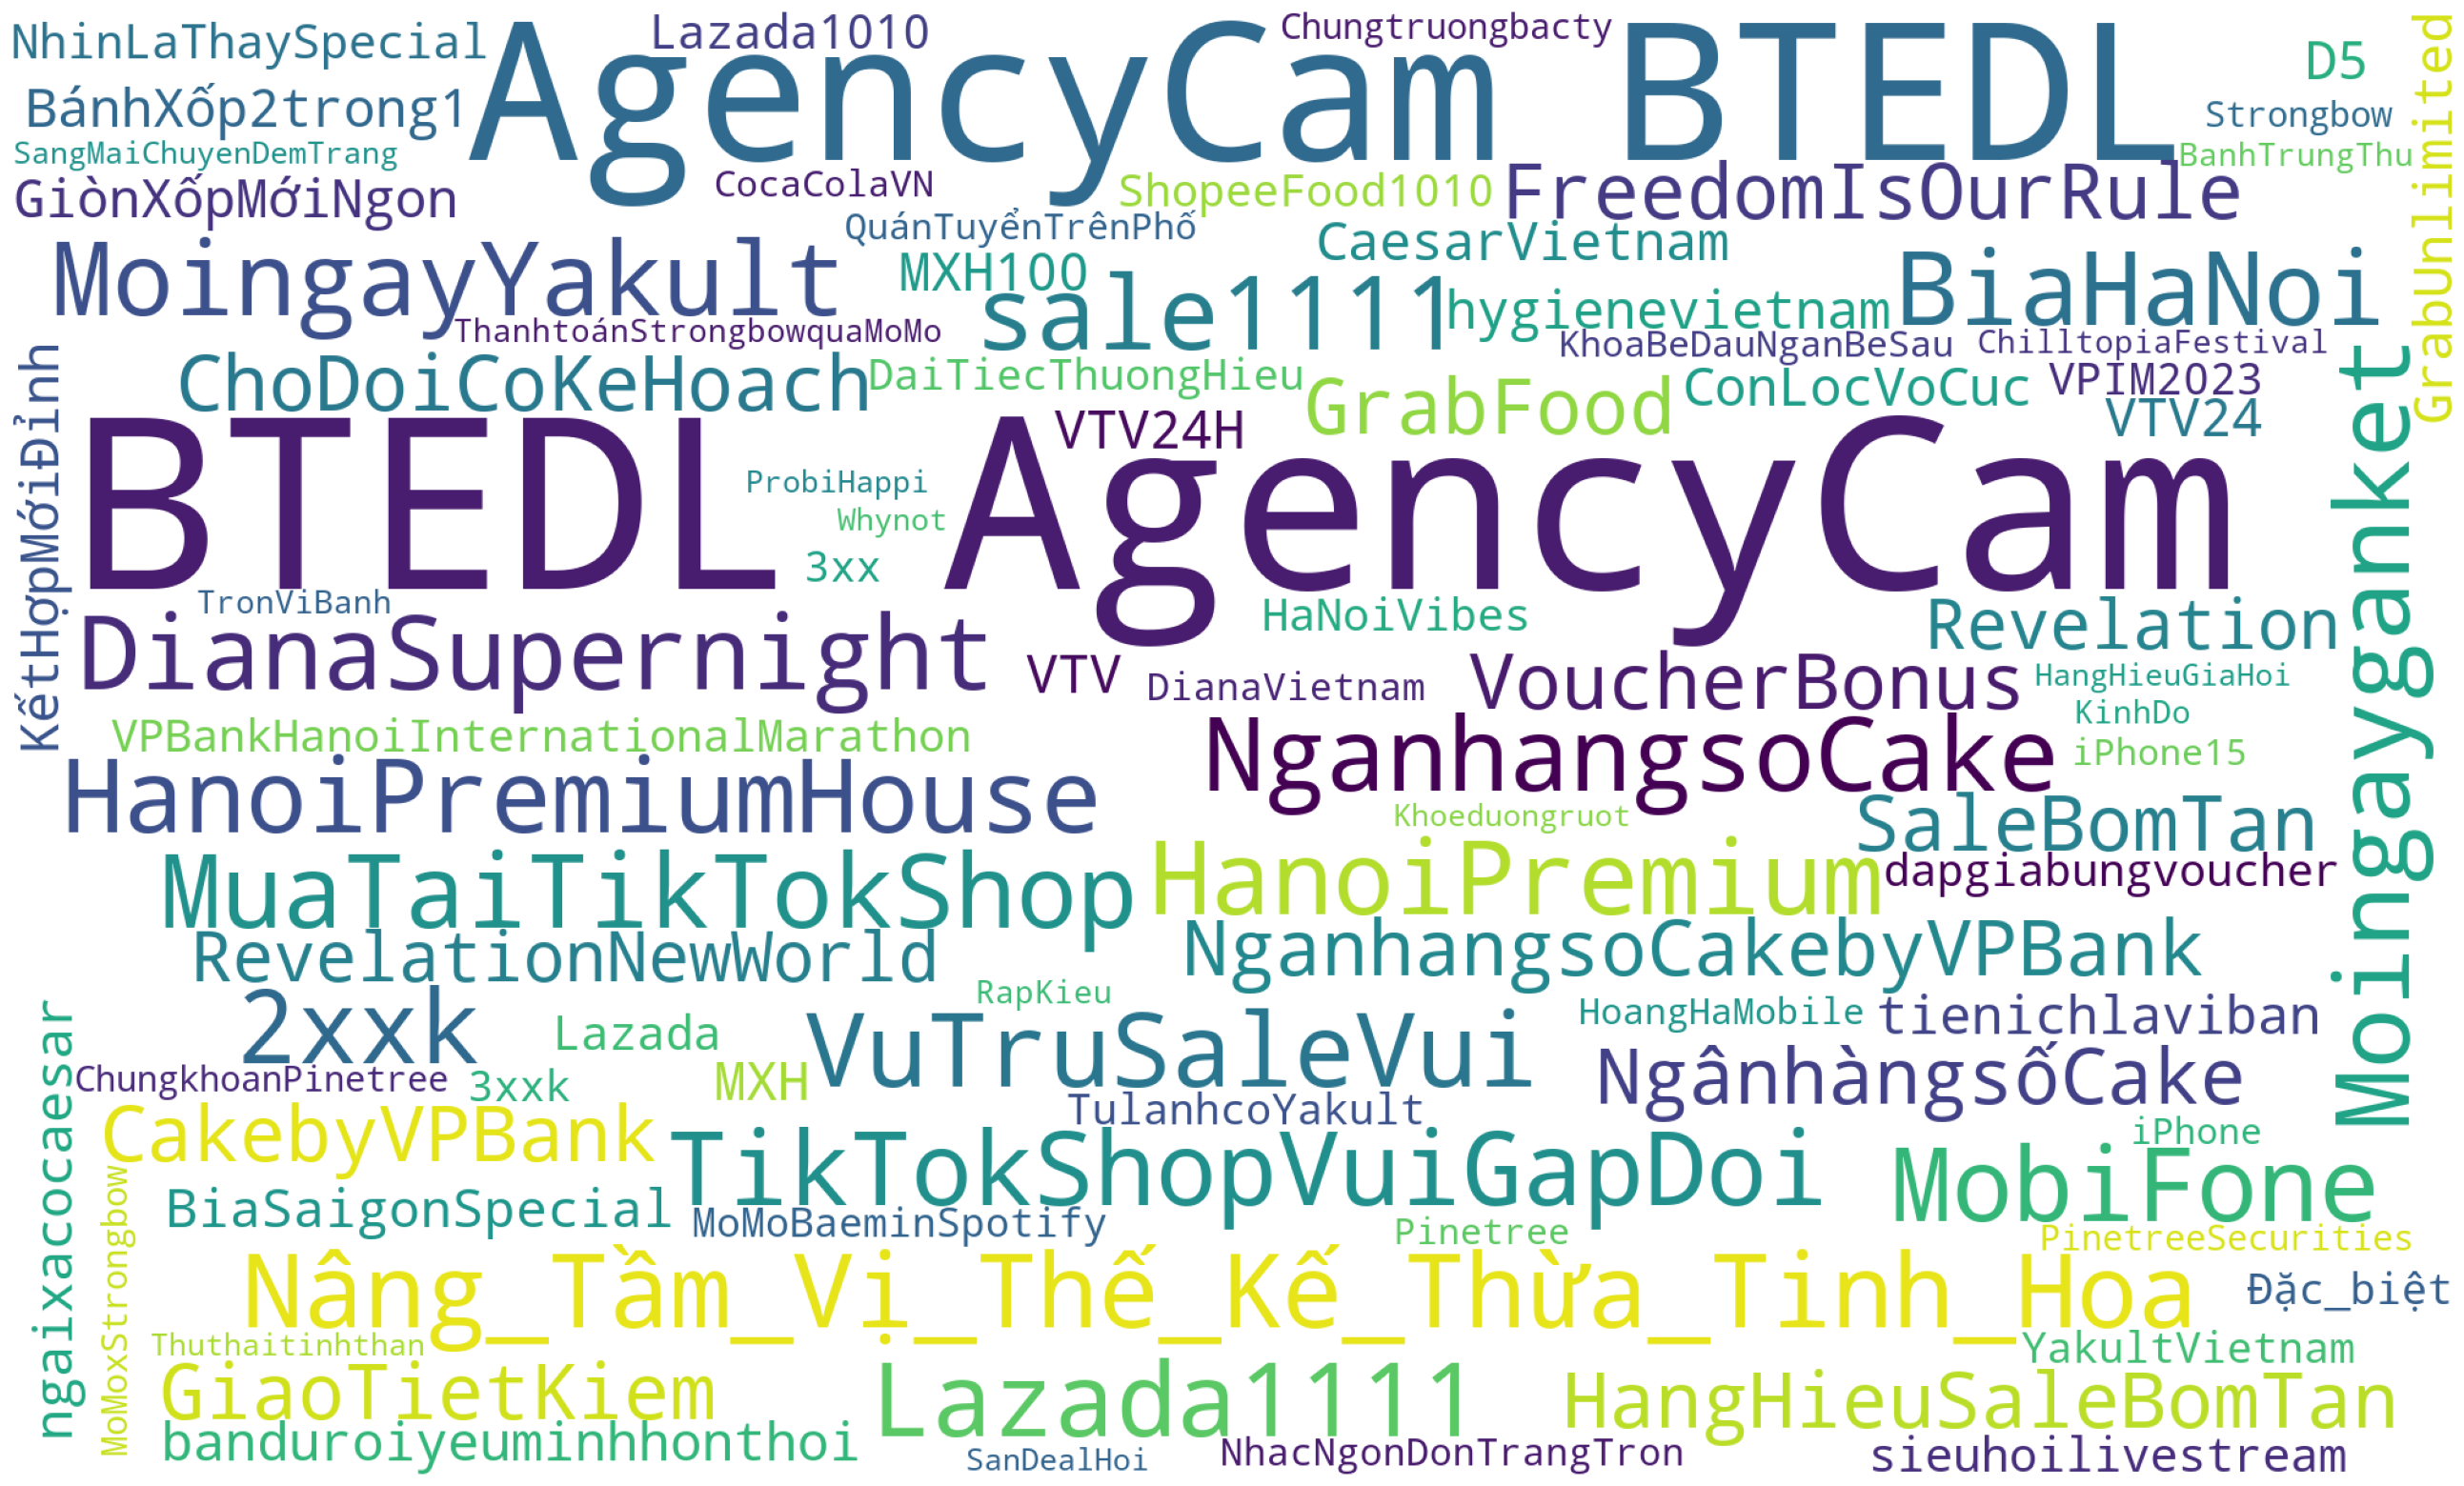

In [297]:
# text = str(df_raw['message'])
wc = wordcloud.WordCloud(
	stopwords=wordcloud.STOPWORDS,
	background_color='white',
	max_words=300,
	width=2000,
	height=1200).generate(text)

plt.figure(figsize=(40, 20))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

Hầu như mọi hashtag đều có nội dung phục vụ mục đích quảng cáo

In [28]:
texts = []
for line in df_clean['message']:
	texts.append(line)

text = " ".join(texts)

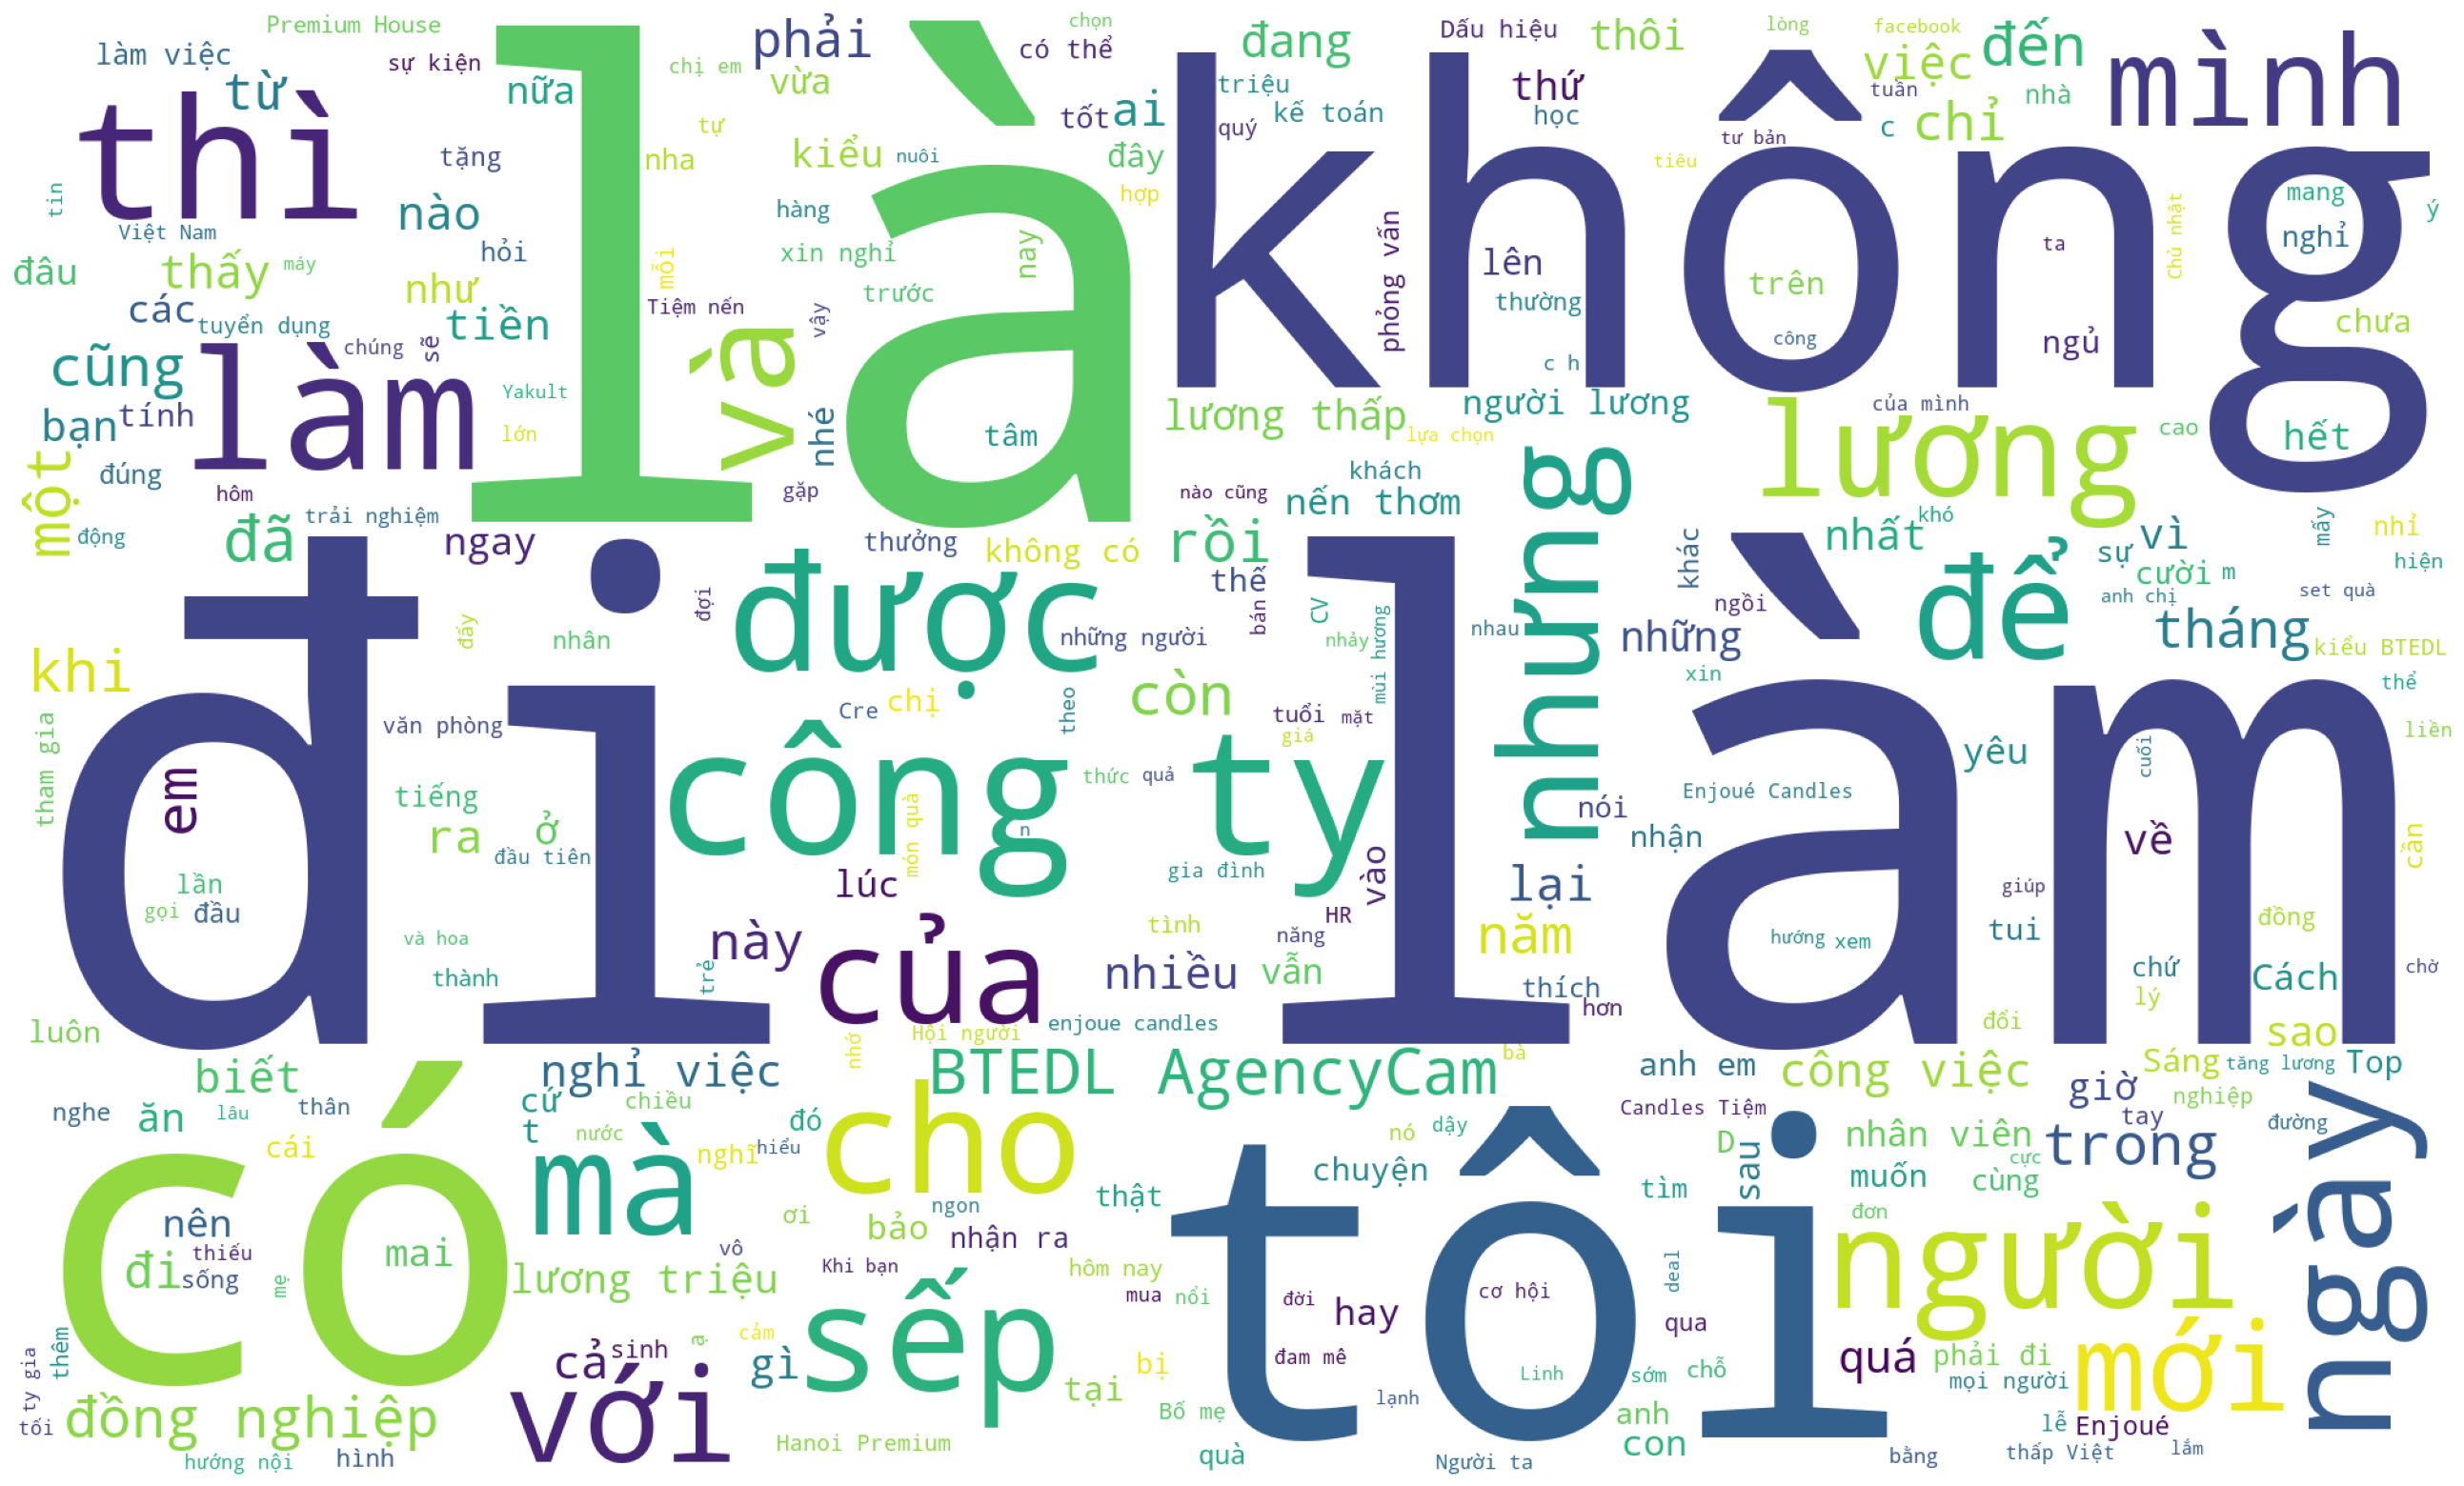

In [29]:
# text = str(df_raw['message'])
wc = wordcloud.WordCloud(
	stopwords=wordcloud.STOPWORDS,
	background_color='white',
	max_words=300,
	width=2000,
	height=1200).generate(text)

plt.figure(figsize=(40, 20))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()